<body>
<div style=" color:black; background: linear-gradient(to bottom, #f02a02 0%, #FFFFFF 10%,  #FFFFFF 40%, #f02a02 100%); height: 100%;">
<center><br>
<h1><b>MOD510: Mandatory project #4</b></h1>
<br>
    <h2><b>Asim Sabir                 261876</b></h2> 
    <h2><b>Muhammad Usama             261882</b></h2>
    <h2><b>Syed Muhammad Aizaz Haider 261875</b></h2>
<h6><b>13.12.2020</b></h6>
</center>
</div>
</body>
$\renewcommand{\vec}[1]{\mathbf{#1}}
\newcommand{\DDT}[1]{\frac{\partial}{\partial t}{#1}}
\newcommand{\DDR}[1]{\frac{\partial}{\partial r}{#1}}
\newcommand{\DDY}[1]{\frac{\partial}{\partial y}{#1}}
\newcommand{\DFDT}[1]{\frac{\partial{#1}}{\partial t}}
\newcommand{\DFDP}[1]{\frac{\partial{#1}}{\partial p}}
\newcommand{\DFDR}[1]{\frac{\partial{#1}}{\partial r}}
\newcommand{\DFDY}[1]{\frac{\partial{#1}}{\partial y}}
\newcommand{\dydr}{\frac{dy}{dr}}
\newcommand{\drdy}{\frac{dr}{dy}}
\newcommand{\TENSOR}[1]{\mathbf{#2}}$



<br>
<center> <font color=#f02a02 size = 12><b>Gone Randomly Viral</font> 


  
![SegmentLocal](inf2.gif "segment2")
    

# Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import gc
import math
import random

In [6]:
# Sets the font size, and bolds the text in plots
font = {'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

# Abstract


<p style="text-align:justify">To model and understand an outbreak in a population, a model with more realistic approach is implemented in this project. This has been implemented by Monte Carlo and Random-Walk model where interaction happens between healthy/exposed/immune and sick/dead which have different possibility of getting infected or not getting infected. The 2 compartment Random Walk model implemented is then used to compare for different parameters to determine changes for different conditions of model and to determine the effective rate of infection. The results illustrated give a clear idea of how spread will change if the parameters are changed. The model developed is then further accounted for categorizing the population into different classes based on ages to investigate how the COVID-19 outbreak spread will change the behavior for both set of population. At the end of the project, we have introduced quarantine and vaccine to stop/minimize the effects of the outbreak. These types of models can help in understanding the behavior of an outspread and how to eradicate and minimize the effects.

# Introduction

<p style="text-align:justify">Monte Carlo simulations are used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty in prediction and forecasting models. This project incorporates the concept of compartment modeling for random walk scenarios in which infected, and not infected individuals are free to move within a certain location. Using Monte Carlo simulations, we can model different probable scenarios to predict about the possible outcomes of a certain problem. Random walk model implemented in this project takes in account for different properties and restrictions of an individual unit to determine how prone or immune the population is when they are exposed to an outbreak. The base of this project is two compartmental model which is further expanded along proceeding with different problems. It initially helps to illustrate the healthy and sick people in a community and  helps in finding out the deterministic parameters of a community facing disease outbreak for varying initial infectious people to describes β(t) (effective rate of infection per unit time) changes. We will than modify our original SI model to understand the changes due to change in β(t). This model is then extended with two classes based on ages. The young and old population definitely have different properties and show different behaviors for diseases outbreak. These changes are investigated by changing the probability of interaction of young and old people with infected people. It was important that we compare changes with previous parametric values in order to determine the effect on our initial parameters and assumptions of SI model. Finally, we have implemented our own scenario in this SI model where we imposed vaccines and quarantine to investigate the effectiveness of these options to eliminate disease outspread and to eradicate the pandemic situations.

# Main Class 

In [38]:
class RandomWalkEpidemicSimulator:
    """
    Class used to model the spreading of a contagious disease in a
    population of individuals with a 2D random walk.

    Each walker has a disease status which is represented by an 
    integer Enum. Also, a set of integer (x, y)-coordinates are 
    stored for each walker. The possible coordinates are:

        {0, 1, ..., Lx-1} in the x-direction
        {0, 1, ..., Ly-1} in the y-direction

    It is only possible to move North, South, East, or West. If a 
    walker attempts to move outside of the physical domain, nothing 
    happens (i.e., a "bounce-back boundary condition" is enforced).
    """
    def __init__(self, population_size, no_init_infected=1, nx=50, ny=50, q=0.9,yq = 0.2,
                 dr=0.1,dr_T = 50,ts_=300,repititions = 100, ant_arr=300, ant_eff= 0.5, 
                 Ther_arr= 300, ant_Peri = 12, Ther_Peri=3):
        """
        :param population_size: The total number of people (N).
        :param no_init_infected: The number of infected people at t=0.
        :param nx: The number of lattice nodes in the x-direction 
        :param ny: The number of lattice nodes in the y-direction.
        :param q: The probability of infection (0 <= q <= 1).
        :param ts: Time steps for simulation
        :param yq: Probability of young people getting infected
        :param dr: death rate for infected people
        :param dr_T: time where death is count ( death_rate*Inefected people/dr_T) 
        :param repitions: Monte-Carlo number of repetitions
        :param ant_arr: Antigen Vaccine Arrival time (hours)
        :param ant_eff: Antigen Vaccine efficiency
        :param Ther_arr: Therapeutic Vaccine Arrival time (hours)
        :param ant_Peri: Antigen Vaccine availability period (after how many hours the next shot is available)
        :param Ther_Peri: Therapeutic Vaccine availability period (after how many hours the next shot is available)
        """
        self.N_ = population_size
        self.I0_= no_init_infected
        self.nx_= nx
        self.ny_= ny
        self.infection_probability_ = q
        
        self.SUSCEPTIBLE_ = 0
        self.INFECTIOUS_  = 1
        self.RECOVERD_ = 2
        self.DEAD_ = 3
        
        self.State_ = np.full(self.N_,self.SUSCEPTIBLE_)
        self.State_[0:self.I0_] = self.INFECTIOUS_
        
        self.Walkers_ = np.random.randint(0,[self.nx_, self.ny_],size=(self.N_, 2))
        self.ts_ = ts_
        self.Walkers_Old_ = np.copy(self.Walkers_)
        
        self.S =self.Walkers_[self.State_==  self.SUSCEPTIBLE_]
        self.I=self.Walkers_[self.State_ == self.INFECTIOUS_]
        
        self.NumberofS=[]
        self.NumberofS.append(len(self.S))
        self.NumberofI=[]
        self.NumberofI.append(len(self.I))
        self.beta_ = []
        self.reps_ = repititions
        
        self.OLD_ = 5
        self.YOUNG_ = 6
        
        self.State3_ = np.full(self.N_,self.YOUNG_)                               
        self.State3_[0:self.I0_] = self.INFECTIOUS_
        self.State3_[self.I0_:int((self.N_-self.I0_)/2)+self.I0_] = self.OLD_
        self.State3_[int(math.ceil((self.N_-self.I0_)/2))+self.I0_:] = self.YOUNG_
        
        self.Y = self.Walkers_[self.State3_==  self.YOUNG_]
        self.O = self.Walkers_[self.State3_==  self.OLD_]
        self.I3 = self.Walkers_[self.State3_ == self.INFECTIOUS_]
        self.S3 = self.Walkers_[self.State3_ != self.INFECTIOUS_]

        
        self.NumberofY3=[]
        self.NumberofY3.append(len(self.Y))
        self.NumberofO3=[]
        self.NumberofO3.append(len(self.O))
        self.NumberofI3=[]
        self.NumberofI3.append(len(self.I3))
        
        self.youngprob = yq
        self.deathratio = dr
        self.deathAvgPeriod = dr_T
        self.D3 = self.Walkers_[self.State3_ == self.DEAD_]
        self.NumberofD3=[]
        self.NumberofD3.append(len(self.D3))
        self.antigen_arrival = ant_arr
        self.antigen_eff = ant_eff
        self.Therapeutic_arrival = Ther_arr
        self.antige_Period = ant_Peri
        self.Therapeutic_Period = Ther_Peri

    def reset_(self, population_size, no_init_infected, nx, ny, q,ts,repititions):
        
        """
        reset all model parameters at t = 0. 
        
        """
        
        print("Reset subroutine called !")
        self.__init__(population_size, no_init_infected, nx, ny, q,ts,repititions)
        print("Reset subroutine Finished !")
        
        
    def plot_random_walk(self):
        """
        Initializes and plots the location of Infectious and Susceptible population at time = 0
           
        """
        self.S =self.Walkers_[self.State_==  self.SUSCEPTIBLE_]
        self.I=self.Walkers_[self.State_ == self.INFECTIOUS_]
        
        
        fig,ax = plt.subplots(figsize=(20, 10))

        plt.xlim(-2,self.nx_+2)
        plt.ylim(-2,self.ny_+2)
        
        ax.scatter(self.S[:,0],self.S[:,1],c='g')
        ax.scatter(self.I[:,0],self.I[:,1],c='r',s=80)
        
        
        rect = patches.Rectangle((0.00,0.00),self.nx_,self.ny_,linewidth=3,edgecolor='b',facecolor='none')
        ax.add_patch(rect)
        ax.grid()
        
        plt.title('Collision Grid')
        plt.xlabel('Nx')
        plt.ylabel('Ny')
        
        plt.show()
        
    def move_walkers_ts_timesteps_zero_repititions_(self,plot = True):
        '''
        Move walkers a single step either in x or in y-axis for total number of steps given i.e. ts_
        calls the function is_at_illegal_position to check if walker is out of nxy area 
        if it returns true, walker retains the old position
        
        '''
        
        for step in range(self.ts_):
            
            u =  np.random.randint(1,5,size=(self.N_))
            next_pos=[]
            for ind in u:
                if (ind == 1):
                    next_pos.append([1,0])
                if (ind == 2):
                    next_pos.append([0,1])
                if (ind == 3):
                    next_pos.append([-1,0])
                if (ind == 4):
                    next_pos.append([0,-1])

                    
            self.Walkers_Old_=np.copy(self.Walkers_)
            self.Walkers_ += next_pos
            for (j,idx) in enumerate(self.Walkers_,start=0):
                if self.is_at_illegal_position(idx):
                    self.Walkers_[j]=self.Walkers_Old_[j]
            
            self.collision_check_()
            
        if (plot):
            self.plot_wrt_Time()
            
    
    def is_at_illegal_position(self,walker):
        '''
        Checks if the walker has not go out of bound and returns true or False accordingly
        '''
        if walker[0] >= 0 and walker[0] <= self.nx_ and walker[1] >= 0 and walker[1] <= self.ny_:
            return False
        else:
            return True
       
    def collision_check_(self):
        
        '''
        Checks if the Susceptible and Infectious has collided
        stores the number of Susceptible and Infectious in self.NumberofS and self.NumberofI respectively
        '''
        self.I = np.where(self.State_ == self.INFECTIOUS_)[0]                                                  
        for idx, idx_infect in enumerate(self.I):

            corr_x = self.Walkers_[idx_infect, 0]
            corr_y = self.Walkers_[idx_infect, 1]

            idx_same_place = np.where((self.Walkers_[:, 0] == corr_x) & (self.Walkers_[:, 1] == corr_y))[0]

            
            Susceptible_same_place = idx_same_place[self.State_[idx_same_place]==self.SUSCEPTIBLE_]
            
            for idx in range(len(Susceptible_same_place)):

                prob = np.random.uniform(0,1)
                if prob < self.infection_probability_:
                    self.State_[Susceptible_same_place[idx]]=self.INFECTIOUS_
        
        self.I=self.Walkers_[self.State_== self.INFECTIOUS_]
        self.S=self.Walkers_[self.State_== self.SUSCEPTIBLE_]
        Susceptible,Infectious=len(self.S),len(self.I)
        
        self.NumberofS.append(Susceptible)
        self.NumberofI.append(Infectious)
        
        

    def plot_wrt_Time(self):
        
        '''
        Plots the no. of susceptibles and no. of infectious vs the given no. of steps
        
        '''
        
        fig,ax = plt.subplots(figsize=(40, 20))
        ax.plot(np.arange(0,self.ts_+1),self.NumberofS,'g',label = 'SUSCEPTIBLE')
        ax.plot(np.arange(0,self.ts_+1),self.NumberofI,'r',label = 'INFECTIOUS')
        ax.grid()
        ax.legend()
        
        plt.title('SUSCEPTIBLE vs INFECTIOUS')
        plt.xlabel('Time Steps')
        plt.ylabel('Population')
        
        plt.show()
        
#________________________________________________Exercise 1 Simulator_________________________________________________#   

    def simulateEx1(self):
        
        '''
        Excercise 1 simulator
        prints Number of survivors and infected after a given time period
        
        '''
        
        self.plot_random_walk()
        self.move_walkers_ts_timesteps_zero_repititions_()
        self.plot_random_walk()

        print("Number of survivors at the end of",self.ts_," time steps, are:",len(self.S))
        print("Number of infected at the end of",self.ts_," time steps, are:",len(self.I))
        
        print("Simulation Completed! , Resetting Class Instance....")
        self.reset_(self.N_,self.I0_,self.nx_,self.ny_,self.infection_probability_,self.ts_,self.reps_)
        
   
    def move_walkers_repeatedy(self):
        
        '''
        performs Monte Carlo simulation 
        calls self.move_walkers_ts_timesteps_zero_repititions_ for a given number of repetitions
        returns dataframes containing S and I values equal to number of reps at a timestep
        
        '''
        
        print("move_walkers_repeatedy called .. ")
        
        S=[]
        I=[]
        for rep in range (self.reps_):
            self.move_walkers_ts_timesteps_zero_repititions_(plot = False)
            
            S.append(self.NumberofS)
            I.append(self.NumberofI)
            self.__init__(population_size = self.N_,no_init_infected = self.I0_,nx = self.nx_,ny =self.ny_,q = self.infection_probability_,ts_ = self.ts_,repititions = self.reps_)
        
        df1 = pd.DataFrame(S) 
        df2 = pd.DataFrame(I)
        
        print("move_walkers_repeatedy finished .. ")
        return df1,df2
    
    def mean_STD_computation(self):
        
        '''
        calls self.move_walkers_repeatedy and gets dataframes of S and I at each time step
        Calculates Mean and std of S and I 
        returns Means and std of S and I
        '''
        
        print("mean_STD_computation called .. ")
        
        S_df,I_df = self.move_walkers_repeatedy()
        
        s_df = S_df.copy()
        s_df = s_df.T
        
        s_df['MEAN'] = s_df.mean(numeric_only=True, axis=1)
        S_MEAN = s_df['MEAN']
        del s_df['MEAN']
        gc.collect()
        
        s_df['STD'] = s_df.std(numeric_only=True, axis=1)
        S_STD = s_df['STD']
        del s_df['STD']
        gc.collect()
        
        i_df = I_df.copy()
        i_df = i_df.T
        
        i_df['MEAN'] = i_df.mean(numeric_only=True, axis=1)
        I_MEAN = i_df['MEAN']
        del i_df['MEAN']
        gc.collect()
        
        i_df['STD'] = i_df.std(numeric_only=True, axis=1)
        I_STD = i_df['STD']
        del i_df['STD']
        gc.collect()
        
        print("mean_STD_computation finished ..")
        
        
        return S_MEAN,S_STD,I_MEAN,I_STD
        
    def plot_wrt_time_inc_errors(self, analytical = False):
        
        '''
        Plots Mean and SD of S and I values vs self.ts_
        checks for analytical solutions to plot or not 
        
        '''
        
        print("plot_wrt_time_inc_errors called .. ")
        S_MEAN,S_STD,I_MEAN,I_STD = self.mean_STD_computation()
        
        
        fig,ax = plt.subplots(figsize=(40, 20))
        if (analytical):
            print("Calculating Analytical Solution ..")
            Infected_t,Susceptible_t,beta_function_array = self.Analytical_(I_MEAN[:-1])
            ax.plot(np.arange(0,self.ts_),Infected_t,'-.',label = 'Analytical_INFECTIOUS', linewidth = 4)
            ax.plot(np.arange(0,self.ts_),Susceptible_t,'-.',label = 'Analytical_SUSCEPTIBLE',linewidth = 4)
            
            
        ax.plot(np.arange(0,self.ts_+1),S_MEAN.to_numpy(),'g',label = 'SUSCEPTIBLE')
        ax.fill_between(np.arange(0,self.ts_+1), S_MEAN.to_numpy()-S_STD.to_numpy()
                        , S_MEAN.to_numpy()+S_STD.to_numpy(),color = 'g',alpha = 0.1)
        
        ax.plot(np.arange(0,self.ts_+1),I_MEAN.to_numpy(),'r',label = 'INFECTIOUS')
        ax.fill_between(np.arange(0,self.ts_+1), I_MEAN.to_numpy()-I_STD.to_numpy()
                        , I_MEAN.to_numpy()+I_STD.to_numpy(),color = 'r',alpha = 0.1 )
    
        
        ax.grid()
        ax.legend()
        
        plt.title('SUSCEPTIBLE vs INFECTIOUS')
        plt.xlabel('Time Steps')
        plt.ylabel('Population')
        
        plt.show()
        if (analytical):
            plt.figure(figsize=(40,20))
            plt.plot(np.arange(0,self.ts_),beta_function_array,label = 'Beta (β)',linewidth = 4)
            plt.legend()
            plt.xlabel('Number of steps')
            plt.ylabel('Rate of infection')
            plt.title('Calculated beta with beta function')
            plt.grid()
            plt.show()
        print("plot_wrt_time_inc_errors finished .. ")
    
    
    def Analytical_(self,I_MEAN):
        
        '''
    
        Calculates analytical solution and Beta function
        returns analytical I(t), S(t), beta(t)
        
        '''
        _beta = np.arange(0,1,0.000001)
        I_calculated  = np.zeros(_beta.shape)
        
        Infected_t = []
        Susceptible_t = []
        beta_function_array = []
        
        for i in range(len(I_MEAN)):
            I_calculated = self.N_/(1 + (self.N_-self.I0_)/self.I0_ * np.exp(-_beta*i))
            idx = (np.abs(I_calculated - I_MEAN[i])).argmin()
            
            if I_calculated[idx] < self.N_:
                beta_function_array.append(_beta[idx])
                Infected_t.append(I_calculated[idx])
                Susceptible_t.append((((self.N_) * (self.N_-self.I0_)/self.I0_ * np.exp(-beta_function_array[-1]*i))/ (1 + (self.N_-self.I0_)/self.I0_ * np.exp(-beta_function_array[-1]*i))))
            else:
                beta_function_array.append(0)
                Infected_t.append(Infected_t[-1])  # retaining previous value at beta = 0
                Susceptible_t.append(Susceptible_t[-1]) # retaining previous value at beta = 0
        
        
        return (Infected_t,Susceptible_t,beta_function_array) 

#_______________________________________________Exercise 2 Simulator__________________________________________________# 

    def simulateEx2(self, analytical = False):
        '''
        Simulate function for excercise 2
        resets parameters after simulation finishes
        '''
        
        if (analytical):
            self.plot_wrt_time_inc_errors(analytical = True)
            print("Simulation Completed! , Resetting Class Instance....")
        else:
            self.plot_wrt_time_inc_errors()
            print("Simulation Completed! , Resetting Class Instance....")
        
        self.reset_(self.N_,self.I0_,self.nx_,self.ny_,self.infection_probability_,self.ts_,self.reps_)    


        
    def beta_estimate(self,S_post,S_prev,I_post):
        
        '''
        Estimate beta using equation 4 and pushes beta to zero at S = 0
        returns beta
        '''
        if(S_post > 0):
            β = -(self.N_ * (S_post-S_prev)) / (S_post*I_post)
        else:
            β = 0
        return β 
        
    def beta_arr_computation(self,plot = True):
        
        '''
        estimates and plot beta array using I_Mean and S_MEAN
        '''
        
        S_mean_arr,S_std_arr,I_mean_arr,I_std_arr = self.mean_STD_computation()
        print("S and I mean array wrt. time steps ceated")
        
        for idx in range (1,self.ts_+1):
            self.beta_.append(self.beta_estimate(S_mean_arr[idx],S_mean_arr[idx-1],I_mean_arr[idx]))

        if (plot):
            
            plt.figure(figsize=(40,20))
            plt.plot(np.arange(0,self.ts_),self.beta_,label = 'Beta (β)',color = 'r')
            
            plt.legend()
            plt.xlabel('Number of steps')
            plt.ylabel('Effective Rate of infection')
            plt.title('Estimated beta')

            plt.show()
            
            
    def collision_check_OldnYoung(self):
        
        '''
        Checks the collision of young and old with infecticious
        stores Number of Young, old and infectcious
        
        '''
        
        self.I3 = np.where(self.State3_ == self.INFECTIOUS_)[0]                                                  
        for idx, idx_infect in enumerate(self.I3):
            corr_x = self.Walkers_[idx_infect, 0]
            corr_y = self.Walkers_[idx_infect, 1]

            idx_same_place = np.where((self.Walkers_[:, 0] == corr_x) & (self.Walkers_[:, 1] == corr_y))[0]
            OLDPeople_same_place = idx_same_place[self.State3_[idx_same_place]==self.OLD_]

            for idx in range(len(OLDPeople_same_place)):
                prob = np.random.uniform(0,1)
                if prob < self.infection_probability_:
                    self.State3_[OLDPeople_same_place[idx]]=self.INFECTIOUS_
               
            YoungPeople_same_place = idx_same_place[self.State3_[idx_same_place]==self.YOUNG_]
            for idx in range(len(YoungPeople_same_place)):

                prob = np.random.uniform(0,1)
                if prob < self.infection_probability_:
                    self.State3_[YoungPeople_same_place[idx]]=self.INFECTIOUS_
        
        self.I3=self.Walkers_[self.State3_== self.INFECTIOUS_]
        self.O =self.Walkers_[self.State3_==  self.OLD_]
        self.Y =self.Walkers_[self.State3_==  self.YOUNG_]
            
        Old,Young,Infectious=len(self.O),len(self.Y),len(self.I3)
        self.NumberofO3.append(Old)
        self.NumberofY3.append(Young)
        self.NumberofI3.append(Infectious)
        
    
    def move_OldnYoung_walkers_ts_timesteps_zero_repititions_(self,plotcollisiongrid = False,timeplot = False):
        
        '''
        Move old and young one step at a time in either x or y direction for self.ts_ times
        '''
        
        if (plotcollisiongrid):
            self.plot_collisiongrid_OldnYoung()
        
        for step in range(self.ts_):
            
            self.Walkers_Old_=np.copy(self.Walkers_)
            #Moving Young
            u =  np.random.randint(1,5,size=(np.where(self.State3_ == self.YOUNG_)[0].size))
            next_pos=[]
            for ind in u:
                if (ind == 1):
                    next_pos.append([1,0])
                if (ind == 2):
                    next_pos.append([0,1])
                if (ind == 3):
                    next_pos.append([-1,0])
                if (ind == 4):
                    next_pos.append([0,-1])
            
            if(len(self.Walkers_[self.State3_ == self.YOUNG_]) != 0):
                self.Walkers_[self.State3_ == self.YOUNG_] = self.Walkers_[self.State3_ == self.YOUNG_] + np.asarray(next_pos)
            
            #Moving Infected
            u =  np.random.randint(1,5,size=(np.where(self.State3_ == self.INFECTIOUS_)[0].size))
            next_pos=[]
            for ind in u:
                if (ind == 1):
                    next_pos.append([1,0])
                if (ind == 2):
                    next_pos.append([0,1])
                if (ind == 3):
                    next_pos.append([-1,0])
                if (ind == 4):
                    next_pos.append([0,-1])
            if(len(self.Walkers_[self.State3_ == self.INFECTIOUS_]) != 0):
                self.Walkers_[self.State3_ == self.INFECTIOUS_] = self.Walkers_[self.State3_ == self.INFECTIOUS_] + np.asarray(next_pos)
            
            #Moving Old
            u =  np.random.randint(1,6,size=(np.where(self.State3_ == self.OLD_)[0].size))
            next_pos=[]
            for ind in u:
                if (ind == 1):
                    next_pos.append([1,0])
                if (ind == 2):
                    next_pos.append([0,1])
                if (ind == 3):
                    next_pos.append([-1,0])
                if (ind == 4):
                    next_pos.append([0,-1])
                if (ind == 5):
                    next_pos.append([0,0])
            
            #print(len(next_pos),len(self.Walkers_[self.State3_ == self.OLD_]))
            if(len(self.Walkers_[self.State3_ == self.OLD_]) != 0):
                self.Walkers_[self.State3_ == self.OLD_] =self.Walkers_[self.State3_ == self.OLD_] + np.asarray(next_pos)
            
            for (j,idx) in enumerate(self.Walkers_,start=0):
                if self.is_at_illegal_position(idx):
                    self.Walkers_[j]=self.Walkers_Old_[j]
            self.collision_check_OldnYoung()
        
        if (plotcollisiongrid):
            self.plot_collisiongrid_OldnYoung()
        
        if (timeplot):
            self.Timeplot_OldnYoung()
   
    def plot_collisiongrid_OldnYoung(self):

        '''
        Plot collision grid
        '''
        fig,ax = plt.subplots(figsize=(16, 8))
        plt.xlim(-2,self.nx_+2)
        plt.ylim(-2,self.ny_+2)

        ax.scatter(self.Y[:,0],self.Y[:,1],c='g',label = 'Young')
        ax.scatter(self.O[:,0],self.O[:,1],c='b',label = 'Oldies')
        ax.scatter(self.I3[:,0],self.I3[:,1],c='r',s=80,label = 'Infected')
        rect = patches.Rectangle((0.00,0.00),self.nx_,self.ny_,linewidth=3,edgecolor='b',facecolor='none')
        ax.add_patch(rect)
        ax.grid()
        ax.legend()
        plt.title('Collision Grid')
        plt.xlabel('Nx')
        plt.ylabel('Ny')
        plt.show()
            
    def Timeplot_OldnYoung(self):
        
        '''
        Plots No.of young,old and infectious vs each time step given
        
        '''
        
        fig,ax = plt.subplots(figsize=(16, 8))
        ax.plot(np.arange(0,self.ts_+1),self.NumberofO3[0:self.ts_+1],label = 'SUSCEPTIBLE - OLD ')
        ax.plot(np.arange(0,self.ts_+1),self.NumberofY3[0:self.ts_+1],label = 'SUSCEPTIBLE - YOUNG')
        ax.plot(np.arange(0,self.ts_+1),self.NumberofI3[0:self.ts_+1],'r',label = 'INFECTIOUS')
        ax.grid()
        ax.legend()
        plt.title('SUSCEPTIBLE vs INFECTIOUS')
        plt.xlabel('Time Steps')
        plt.ylabel('Population')
        plt.show()
        
        
    def move_OldnYoung_repeatedy(self):
        
        '''
        Monte Carlo on OY model
        '''
        
        print("move_OldnYoung_repeatedy called .. ")
        
        Y=[]
        O=[]
        I=[]
        for rep in range (self.reps_):
            self.move_OldnYoung_walkers_ts_timesteps_zero_repititions_()
            
            Y.append(self.NumberofY3)
            O.append(self.NumberofO3)
            I.append(self.NumberofI3)
            
            self.__init__(population_size = self.N_,no_init_infected = self.I0_,nx = self.nx_,ny =self.ny_,q = self.infection_probability_,ts_ = self.ts_,repititions = self.reps_)
        
        df1 = pd.DataFrame(Y) 
        df2 = pd.DataFrame(O)
        df3 = pd.DataFrame(I)
        
        print("move_OldnYoung_repeatedy .. ")
        return df1,df2,df3
    
    def OldnYoung_mean_STD_computation(self, plotvstime = False):
        
        '''
        calculates mean and std of young, old and infectious at each time step
        returns Mean and Std values of Y,O and I
        '''
        
        print("OldnYoung_mean_STD_computation called .. ")
        
        Y_df,O_df,I_df = self.move_OldnYoung_repeatedy()
        
        y_df = Y_df.copy()
        y_df = y_df.T
        
        y_df['MEAN'] = y_df.mean(numeric_only=True, axis=1)
        Y_MEAN = y_df['MEAN']
        del y_df['MEAN']
        gc.collect()
        
        y_df['STD'] = y_df.std(numeric_only=True, axis=1)
        Y_STD = y_df['STD']
        del y_df['STD']
        gc.collect()
        
        o_df = O_df.copy()
        o_df = o_df.T
        
        o_df['MEAN'] = o_df.mean(numeric_only=True, axis=1)
        O_MEAN = o_df['MEAN']
        del o_df['MEAN']
        gc.collect()
        
        o_df['STD'] = o_df.std(numeric_only=True, axis=1)
        O_STD = o_df['STD']
        del o_df['STD']
        gc.collect()
        
        i_df = I_df.copy()
        i_df = i_df.T
        
        i_df['MEAN'] = i_df.mean(numeric_only=True, axis=1)
        I_MEAN = i_df['MEAN']
        del i_df['MEAN']
        gc.collect()
        
        i_df['STD'] = i_df.std(numeric_only=True, axis=1)
        I_STD = i_df['STD']
        del i_df['STD']
        gc.collect()
        
        print("OldnYoung_mean_STD_computation ..")
        
        if (plotvstime):
        
            print("plot_wrt_time_inc_errors called .. ")
            Y_MEAN,Y_STD,O_MEAN,O_STD,I_MEAN,I_STD

            fig,ax = plt.subplots(figsize=(20, 10))

            ax.plot(np.arange(0,self.ts_+1),Y_MEAN.to_numpy(),'g',label = 'SUSCEPTIBLE - Young')
            ax.fill_between(np.arange(0,self.ts_+1), Y_MEAN.to_numpy()-Y_STD.to_numpy()
                            , Y_MEAN.to_numpy()+Y_STD.to_numpy(),color = 'g',alpha = 0.1)
            
            ax.plot(np.arange(0,self.ts_+1),O_MEAN.to_numpy(),'m',label = 'SUSCEPTIBLE - Old')
            ax.fill_between(np.arange(0,self.ts_+1), O_MEAN.to_numpy()-O_STD.to_numpy()
                            , O_MEAN.to_numpy()+O_STD.to_numpy(),color = 'm',alpha = 0.3)

            ax.plot(np.arange(0,self.ts_+1),I_MEAN.to_numpy(),'r',label = 'INFECTIOUS')
            ax.fill_between(np.arange(0,self.ts_+1), I_MEAN.to_numpy()-I_STD.to_numpy()
                            , I_MEAN.to_numpy()+I_STD.to_numpy(),color = 'r',alpha = 0.1 )

            ax.grid()
            ax.legend()

            plt.title('SUSCEPTIBLE vs INFECTIOUS')
            plt.xlabel('Time Steps')
            plt.ylabel('Population')

            plt.show()
            print("plot_wrt_time_inc_errors finished .. ")
        
        return Y_MEAN,Y_STD,O_MEAN,O_STD,I_MEAN,I_STD
    
    def beta_arr_computation_OnY(self,plot = True):
        
        '''
        calculates Beta array for OY model
        '''
        
        Y_mean_arr,_,O_mean_arr,_,I_mean_arr,_ = self.OldnYoung_mean_STD_computation()
        
        S_mean_arr = Y_mean_arr+O_mean_arr
        
        print("S and I mean array wrt. time steps ceated")
        for idx in range (1,self.ts_+1):
            self.beta_.append(self.beta_estimate(S_mean_arr[idx],S_mean_arr[idx-1],I_mean_arr[idx]))
                    
        Beta = np.asarray(self.beta_)
        print("Mean of Beta = ",np.mean(Beta),"Median of Beta = ",np.median(Beta),"\n")
        
        if (plot):
            
            plt.figure(figsize=(40,20))
            plt.plot(np.arange(0,self.ts_),self.beta_,label = 'Beta (β)',color = 'b')
            plt.legend()
            plt.xlabel('Number of steps')
            plt.ylabel('Effective Rate of infection')
            plt.title('Estimated beta')

            plt.show()
#__________________________________________________Exercise 3 Simulator__________________________________________________#   

    def simulateEx3(self,betacomp = True,Oldyounganalysis = False,
                    Oldyounganalysis_MonteCarlo = False, betacomp_Oldyoung = False):
        
        '''
        Simulator of Excercise 3
        includes OY model analysis, OY Model Monte Carlo, Beta computation
        '''
        
        if(betacomp):
            self.beta_arr_computation()
            Beta = np.asarray(self.beta_)
            print("Mean of Beta = ",np.mean(Beta),"Median of Beta = ",np.median(Beta),"\n")
            print("Simulation Completed! , Resetting Class Instance....")
            self.reset_(self.N_,self.I0_,self.nx_,self.ny_,self.infection_probability_,self.ts_,self.reps_)
        
        if (Oldyounganalysis):
            print("Without Monte Carlo .. ")
            self.move_OldnYoung_walkers_ts_timesteps_zero_repititions_(plotcollisiongrid = True,timeplot = True) 
            print("Simulation Completed! , Resetting Class Instance....")
            self.reset_(self.N_,self.I0_,self.nx_,self.ny_,self.infection_probability_,self.ts_,self.reps_)
        
        if (Oldyounganalysis_MonteCarlo):
            print("With MC ..")
            self.OldnYoung_mean_STD_computation(plotvstime = True)
            print("Simulation Completed! , Resetting Class Instance....")
            self.reset_(self.N_,self.I0_,self.nx_,self.ny_,self.infection_probability_,self.ts_,self.reps_)
        
        if (betacomp_Oldyoung):
            self.__init__(population_size = self.N_,no_init_infected = self.I0_,nx = self.nx_,ny =self.ny_,q = self.infection_probability_,ts_ = self.ts_,repititions = self.reps_)
            print("Beta Computation in Old and Young people scenario")
            self.beta_arr_computation_OnY(plot = True)
            print("Simulation Completed! , Resetting Class Instance....")
            self.reset_(self.N_,self.I0_,self.nx_,self.ny_,self.infection_probability_,self.ts_,self.reps_) 
            
            
    #_______________________________________________Exercise 4__________________________________________________#           
    
    def collision_check_OldnYoung_Probs_changed(self):
        
        '''
        Checks collision of young and old with infecticious(accounting probablity of getting sick for both age classes)
        
        '''
        
        self.I3 = np.where(self.State3_ == self.INFECTIOUS_)[0]                                                  
        for idx, idx_infect in enumerate(self.I3):
            corr_x = self.Walkers_[idx_infect, 0]
            corr_y = self.Walkers_[idx_infect, 1]

            idx_same_place = np.where((self.Walkers_[:, 0] == corr_x) & (self.Walkers_[:, 1] == corr_y))[0]
            OLDPeople_same_place = idx_same_place[self.State3_[idx_same_place]==self.OLD_]

            for idx in range(len(OLDPeople_same_place)):
                prob = np.random.uniform(0,1)
                if prob < self.infection_probability_:      # Old peoplehave a higher probability of falling ill.
                    self.State3_[OLDPeople_same_place[idx]]=self.INFECTIOUS_

            YoungPeople_same_place = idx_same_place[self.State3_[idx_same_place]==self.YOUNG_]
            for idx in range(len(YoungPeople_same_place)):
                prob = np.random.uniform(0,1)
                if prob < self.youngprob:                        # Young people have a lesser probability of falling ill. 
                    self.State3_[YoungPeople_same_place[idx]]=self.INFECTIOUS_
        self.I3=self.Walkers_[self.State3_== self.INFECTIOUS_]
        self.O =self.Walkers_[self.State3_==  self.OLD_]
        self.Y =self.Walkers_[self.State3_==  self.YOUNG_]
            
        Old,Young,Infectious=len(self.O),len(self.Y),len(self.I3)
        self.NumberofO3.append(Old)
        self.NumberofY3.append(Young)
        self.NumberofI3.append(Infectious)
    
    def DeadUpdates(self,step):
        '''
        allows people to die from infection after a specific time
        '''
        if (step != 0 and step%self.deathAvgPeriod == 0):        

            for i in range (int(self.deathratio*len(self.I3))):
                ind = (random.choice(np.where(self.State3_ == self.INFECTIOUS_)[0]))
                self.State3_[ind] = self.DEAD_
            
            self.D3 = self.Walkers_[self.State3_== self.DEAD_] 
        Deads = len(self.D3)
        self.NumberofD3.append(Deads)
    
    def Vaccination(self,step):
        """
        Two types of Vaccines are administered. [4]
        Therapeutic Vaccine and Antigen Vaccine,
        Therapeutic for Already INFECTED PEOPLE
        Antigen for people who are not sick yet,
        
        Antigen will decrease the probability of getting infected for Young and Old both, where as the 
        Therapeutic one will save the ones who are already sick.
        
        Antigen Vaccine is available in booster shots for everyone "self.antige_Period" hours after advent of vaccine.
        Therapeutic Vaccine is administered on 1 infected person every "self.Therapeutic_Period" hours, due to limited supplies in realistic scenarios
        
        """
        if (step > self.antigen_arrival):
            if ((int(step-self.antigen_arrival))%self.antige_Period == 0):
                self.youngprob = self.youngprob - self.antigen_eff
                self.infection_probability_ = self.infection_probability_ - self.antigen_eff
        
        if (step > self.Therapeutic_arrival):   
            if ((int(step-self.Therapeutic_arrival))%self.Therapeutic_Period == 0):
                x = random.choice([self.OLD_,self.YOUNG_])
                if (len(np.where(self.State3_ == self.INFECTIOUS_)[0]) != 0 ):
                    ind = (random.choice(np.where(self.State3_ == self.INFECTIOUS_)[0]))
                    self.State3_[ind] = x
        
    def move_OldnYoung_restricted(self,plotcollisiongrid = False,timeplot = False,doquarantine = 0,stopquarantine = None,Vaccination = False):
        
        '''
        checks for illegal positions
        Moves old and young population, can implement quarantine and simulate movements fo self.ts_time
        
        '''
        if (stopquarantine == None):
            stopquarantine = self.ts_
    
    #--------------------- Quarantine Position Detector__________________________   
        def is_at_illegal_quarantine_position(walker,oldwalker):
            '''
            Checks for illegal Position in each quadrant
            
            '''
            # Dividing into 4 quadrants
            #|1 2|
            #|3 4|

            
            if (oldwalker[0] < self.nx_/2 and oldwalker[1] > self.ny_/2): #1st Quadrant
             
                if walker[0] >= 0 and walker[0] < self.nx_/2 and walker[1] > self.ny_/2 and walker[1] <= self.ny_:
                    return False
                else:
                    return True
            elif (oldwalker[0] > self.nx_/2 and oldwalker[1] > self.ny_/2): #2nd Quadrant
              
                if walker[0] > self.nx_/2 and walker[0] <= self.nx_ and walker[1] > self.ny_/2 and walker[1] <= self.ny_:
                    return False
                else:
                    return True
            elif (oldwalker[0] < self.nx_/2 and oldwalker[1] < self.ny_/2): #3rd Quadrant
             
                if walker[0] >= 0 and walker[0] < self.nx_/2 and walker[1] >= 0 and walker[1] < self.ny_/2:
                    return False
                else:
                    return True
            elif (oldwalker[0] > self.nx_/2 and oldwalker[1] < self.ny_/2): #4th Quadrant
             
                if walker[0] > self.nx_/2 and walker[0] <= self.nx_ and walker[1] >= 0 and walker[1] < self.ny_/2:
                    return False
                else:
                    return True
            else:
                return False
        
        #--------------------- Quarantine Grid Plotter__________________________   
        def Quarantine_plotcollisiongrid():
            fig,ax = plt.subplots(figsize=(16, 8))
            plt.xlim(-2,self.nx_+2)
            plt.ylim(-2,self.ny_+2)
            
            ax.axvline(linewidth=4, color='c',x=self.nx_/2, ymin=0, ymax=self.ny_)
            ax.axhline(linewidth=4, color='c',y=self.ny_/2, xmin=0, xmax=self.nx_)
            ax.scatter(self.Y[:,0],self.Y[:,1],c='g',label = 'Young')
            ax.scatter(self.O[:,0],self.O[:,1],c='b',label = 'Oldies')
            ax.scatter(self.I3[:,0],self.I3[:,1],c='r',s=80,label = 'Infected')
            rect = patches.Rectangle((0.00,0.00),self.nx_,self.ny_,linewidth=3,edgecolor='b',facecolor='none')
            ax.add_patch(rect)
            ax.grid()
            ax.legend()
            plt.title('Collision Grid')
            plt.xlabel('Nx')
            plt.ylabel('Ny')
            plt.show()
                

        self.I3=self.Walkers_[self.State3_== self.INFECTIOUS_]
        self.O =self.Walkers_[self.State3_==  self.OLD_]
        self.Y =self.Walkers_[self.State3_==  self.YOUNG_]
            
        Old,Young,Infectious=len(self.O),len(self.Y),len(self.I3)
        self.NumberofO3.append(Old)
        self.NumberofY3.append(Young)
        self.NumberofI3.append(Infectious)      
        self.I3=self.Walkers_[self.State3_== self.INFECTIOUS_]
        self.O =self.Walkers_[self.State3_==  self.OLD_]
        self.Y =self.Walkers_[self.State3_==  self.YOUNG_]
            
        Old,Young,Infectious=len(self.O),len(self.Y),len(self.I3)
        
        self.NumberofO3.append(Old)
        self.NumberofY3.append(Young)
        self.NumberofI3.append(Infectious)
           
        if (plotcollisiongrid):
            self.plot_collisiongrid_OldnYoung()
        
        for step in range(self.ts_):
            
            self.DeadUpdates(step)
            self.Walkers_Old_=np.copy(self.Walkers_)
            if (Vaccination):
                self.Vaccination(step)
            #Moving Young
            u =  np.random.randint(1,5,size=(np.where(self.State3_ == self.YOUNG_)[0].size))
            next_pos=[]
            for ind in u:
                if (ind == 1):
                    next_pos.append([1,0])
                if (ind == 2):
                    next_pos.append([0,1])
                if (ind == 3):
                    next_pos.append([-1,0])
                if (ind == 4):
                    next_pos.append([0,-1])
            
            if(len(self.Walkers_[self.State3_ == self.YOUNG_]) != 0):
                self.Walkers_[self.State3_ == self.YOUNG_] = self.Walkers_[self.State3_ == self.YOUNG_] + np.asarray(next_pos)
            
            #Moving Infected
            u =  np.random.randint(1,5,size=(np.where(self.State3_ == self.INFECTIOUS_)[0].size))
            next_pos=[]
            for ind in u:
                if (ind == 1):
                    next_pos.append([1,0])
                if (ind == 2):
                    next_pos.append([0,1])
                if (ind == 3):
                    next_pos.append([-1,0])
                if (ind == 4):
                    next_pos.append([0,-1])
            if(len(self.Walkers_[self.State3_ == self.INFECTIOUS_]) != 0):
                self.Walkers_[self.State3_ == self.INFECTIOUS_] = self.Walkers_[self.State3_ == self.INFECTIOUS_] + np.asarray(next_pos)
            
            #Moving Old
            u =  np.random.randint(1,6,size=(np.where(self.State3_ == self.OLD_)[0].size))
            next_pos=[]
            for ind in u:
                if (ind == 1):
                    next_pos.append([1,0])
                if (ind == 2):
                    next_pos.append([0,1])
                if (ind == 3):
                    next_pos.append([-1,0])
                if (ind == 4):
                    next_pos.append([0,-1])
                if (ind == 5):
                    next_pos.append([0,0])
            
            if(len(self.Walkers_[self.State3_ == self.OLD_]) != 0):
                self.Walkers_[self.State3_ == self.OLD_] =self.Walkers_[self.State3_ == self.OLD_] + np.asarray(next_pos)

            if (plotcollisiongrid and step == doquarantine-1):
                print("Just before Quarantine")
                self.plot_collisiongrid_OldnYoung()
            
            if (plotcollisiongrid and step == doquarantine):
                print("Begining Quarantine")
                Quarantine_plotcollisiongrid()
            if (plotcollisiongrid and step == stopquarantine+1):
                print("Lifting up quarantine now")
                Quarantine_plotcollisiongrid()
            
            if (step >= doquarantine and step < stopquarantine):                                  # Quarantine Restrictions
                for index, (value1, value2) in enumerate(zip(self.Walkers_, self.Walkers_Old_)):
                    if is_at_illegal_quarantine_position(value1,value2):
                        self.Walkers_[index]=self.Walkers_Old_[index]
            else:                                                                                 #Normal Restrictions
                for (j,idx) in enumerate(self.Walkers_,start=0):
                    if self.is_at_illegal_position(idx):
                        self.Walkers_[j]=self.Walkers_Old_[j]
            self.collision_check_OldnYoung_Probs_changed()
        o =self.NumberofO3[-1]
        y = self.NumberofY3[-1]
        i = self.NumberofI3[-1]
        d = self.NumberofD3[-1]
        if (timeplot):
            print("Number of old susceptible are:",o,"Number of young susceptible are:",y,
                  "Number of infected individuals are:",i, "Number of deaths are :", d)
        
        if (plotcollisiongrid and stopquarantine == self.ts_):
            print("At the end, Quarantine lasted till end")
            Quarantine_plotcollisiongrid()
        elif (plotcollisiongrid and stopquarantine != self.ts_):
            print("At the end, we lifted quarantine at: ", stopquarantine, "hours")
            self.plot_collisiongrid_OldnYoung()
            
        if (timeplot):
            fig,ax = plt.subplots(figsize=(16, 8))
            if (Vaccination):
                ax.axvline(linewidth=1, color='Green',x=self.antigen_arrival, ymin=0, ymax=self.N_,label = 'Antigen Vaccine Arrival')
                ax.axvline(linewidth=1, color='y',x=self.Therapeutic_arrival, ymin=0, ymax=self.N_,label = 'Therapeutic Vaccine Arrival')
            
            ax.plot(np.arange(0,self.ts_+1),self.NumberofO3[0:self.ts_+1],'c',label = 'SUSCEPTIBLE - OLD ')
            ax.plot(np.arange(0,self.ts_+1),self.NumberofY3[0:self.ts_+1],'m',label = 'SUSCEPTIBLE - YOUNG')
            ax.plot(np.arange(0,self.ts_+1),self.NumberofI3[0:self.ts_+1],'r',label = 'INFECTIOUS')
            ax.plot(np.arange(0,self.ts_+1),self.NumberofD3[0:self.ts_+1],'black',label = 'DEAD')
            ax.grid()
            ax.legend(loc='upper left', fontsize='xx-small')
            plt.title('SUSCEPTIBLE vs INFECTIOUS')
            plt.xlabel('Time Steps')
            plt.ylabel('Population')
            plt.show()
            
        
    def MonteCarlo_(self,plotcollisiongrid = False,timeplot = False,doquarantine = 0,stopquarantine = None,Vaccination = False,plotvstime=False):
        '''
        Monte Carlo on OYID model
        '''
        
        print("MonteCarlo for Exercise 4 called .. ")

        Y=[]
        O=[]
        I=[]
        D=[]
        for rep in range (self.reps_):
            self.move_OldnYoung_restricted(plotcollisiongrid,timeplot,doquarantine,stopquarantine,Vaccination)
            Y.append(self.NumberofY3)
            O.append(self.NumberofO3)
            I.append(self.NumberofI3)
            D.append(self.NumberofD3)
            self.__init__(nx=self.nx_, ny=self.ny_,population_size = self.N_,ts_ = self.ts_,
                          repititions = self.reps_,no_init_infected = self.I0_, q=0.9,
                          yq = 0.2,dr=self.deathratio,dr_T = self.deathAvgPeriod,ant_arr = self.antigen_arrival,
                         ant_eff= self.antigen_eff, Ther_arr= self.Therapeutic_arrival,Ther_Peri = self.Therapeutic_Period,
                         ant_Peri = self.antige_Period)
        

        Y_df = pd.DataFrame(Y) 
        O_df = pd.DataFrame(O)
        I_df = pd.DataFrame(I)
        D_df = pd.DataFrame(D)
        
        y_df = Y_df.copy()
        y_df = y_df.T
        
        y_df['MEAN'] = y_df.mean(numeric_only=True, axis=1)
        Y_MEAN = y_df['MEAN']
        del y_df['MEAN']
        gc.collect()
        
        y_df['STD'] = y_df.std(numeric_only=True, axis=1)
        Y_STD = y_df['STD']
        del y_df['STD']
        gc.collect()
        
        o_df = O_df.copy()
        o_df = o_df.T
        
        o_df['MEAN'] = o_df.mean(numeric_only=True, axis=1)
        O_MEAN = o_df['MEAN']
        del o_df['MEAN']
        gc.collect()
        
        o_df['STD'] = o_df.std(numeric_only=True, axis=1)
        O_STD = o_df['STD']
        del o_df['STD']
        gc.collect()
        
        i_df = I_df.copy()
        i_df = i_df.T
        
        i_df['MEAN'] = i_df.mean(numeric_only=True, axis=1)
        I_MEAN = i_df['MEAN']
        del i_df['MEAN']
        gc.collect()
        
        i_df['STD'] = i_df.std(numeric_only=True, axis=1)
        I_STD = i_df['STD']
        del i_df['STD']
        gc.collect()
        
        d_df = D_df.copy()
        d_df = d_df.T
        
        d_df['MEAN'] = d_df.mean(numeric_only=True, axis=1)
        D_MEAN = d_df['MEAN']
        del d_df['MEAN']
        gc.collect()
        
        d_df['STD'] = d_df.std(numeric_only=True, axis=1)
        D_STD = d_df['STD']
        del d_df['STD']
        gc.collect()
        
        print("OldnYoung_mean_STD_computation ..")
        
        if (plotvstime):
        
            Y_MEAN,Y_STD,O_MEAN,O_STD,I_MEAN,I_STD,D_MEAN,D_STD

            fig,ax = plt.subplots(figsize=(20, 10))

            ax.plot(np.arange(0,self.ts_+1),Y_MEAN.to_numpy()[0:self.ts_+1],'g',label = 'SUSCEPTIBLE - Young')
            ax.fill_between(np.arange(0,self.ts_+1), Y_MEAN.to_numpy()[0:self.ts_+1]-Y_STD.to_numpy()[0:self.ts_+1]
                            , Y_MEAN.to_numpy()[0:self.ts_+1]+Y_STD.to_numpy()[0:self.ts_+1],color = 'g',alpha = 0.1)
            
            ax.plot(np.arange(0,self.ts_+1),O_MEAN.to_numpy()[0:self.ts_+1],'m',label = 'SUSCEPTIBLE - Old')
            ax.fill_between(np.arange(0,self.ts_+1), O_MEAN.to_numpy()[0:self.ts_+1]-O_STD.to_numpy()[0:self.ts_+1]
                            , O_MEAN.to_numpy()[0:self.ts_+1]+O_STD.to_numpy()[0:self.ts_+1],color = 'm',alpha = 0.1)

            ax.plot(np.arange(0,self.ts_+1),I_MEAN.to_numpy()[0:self.ts_+1],'r',label = 'INFECTIOUS')
            ax.fill_between(np.arange(0,self.ts_+1), I_MEAN.to_numpy()[0:self.ts_+1]-I_STD.to_numpy()[0:self.ts_+1]
                            , I_MEAN.to_numpy()[0:self.ts_+1]+I_STD.to_numpy()[0:self.ts_+1],color = 'r',alpha = 0.1 )
            
            ax.plot(np.arange(0,self.ts_+1),D_MEAN.to_numpy()[0:self.ts_+1],'c',label = 'DEAD')
            ax.fill_between(np.arange(0,self.ts_+1), D_MEAN.to_numpy()[0:self.ts_+1]-D_STD.to_numpy()[0:self.ts_+1]
                            , D_MEAN.to_numpy()[0:self.ts_+1]+D_STD.to_numpy()[0:self.ts_+1],color = 'c',alpha = 0.2)
            
            ax.grid()
            ax.legend()

            plt.title('SUSCEPTIBLE vs Old n Young vs Dead')
            plt.xlabel('Time Steps')
            plt.ylabel('Population')

            plt.show()
        print("Number of old susceptible are:",O_MEAN.to_numpy()[-1],"Number of young susceptible are:",Y_MEAN.to_numpy()[-1],
                  "Number of infected individuals are:",I_MEAN.to_numpy()[-1], "Number of deaths are :", D_MEAN.to_numpy()[-1])
        
        
        return Y_MEAN,Y_STD,O_MEAN,O_STD,I_MEAN,I_STD,D_MEAN,D_STD
        
    def beta_Calc_Ex4(self,plotcollisiongrid = False,timeplot = False,doquarantine = 0,stopquarantine = None,Vaccination = False,plotvstime=False,plot = True):
        '''
        Beta estimation for OYID Model
        '''
        
        Y_mean_arr,_,O_mean_arr,_,I_mean_arr,_,_,_ = self.MonteCarlo_(plotcollisiongrid,timeplot,doquarantine,stopquarantine,Vaccination,plotvstime)
        S_mean_arr = Y_mean_arr+O_mean_arr
        print("S and I mean array wrt. time steps ceated")
        for idx in range (1,self.ts_+1):
            self.beta_.append(self.beta_estimate(S_mean_arr[idx],S_mean_arr[idx-1],I_mean_arr[idx]))
                    
        Beta = np.asarray(self.beta_)
        print("Mean of Beta = ",np.mean(Beta),"Median of Beta = ",np.median(Beta),"\n")
        
        if (plot):
            
            plt.figure(figsize=(40,20))
            plt.plot(np.arange(0,self.ts_),self.beta_,label = 'Beta (β)',color = 'b')
            plt.legend()
            plt.xlabel('Number of steps')
            plt.ylabel('Effective Rate of infection')
            plt.title('Estimated beta')

            plt.show()

# Exercise 1

<p style="text-align:justify">Exercise 1 is the base of the whole project. In this part, we developed a main class named as "RandomWalkEpidemicSimulator". All functions are objects of this class for the sake of speed and simplicity. We have implemented a Random Walk disease model here and our aim is to investigate the disease outspread in a certain locality. We have used the compartmental approach here where we are dividing all the individuals into Susceptible (S) and Infected (I) categories first. S and I individuals move freely in 2D (with movement allowed in one direction at a time, either in x or in y-axis) with restriction like individuals cannot escape the area in their free moment or they cannot do any illegal move and they change their state if they get encounter with an infected person from healthy to infectious. Based on the probability of interaction of the Individuals with each other, the infection's transmission is modeled not only on the movement of the individuals, but also on the probability of getting the infection of the individual. Initially, a single infectious individual is introduced in the model. The Monte Carlo simulation is performed for 683 individuals for 300 steps (random moves) of each individual and the updated values of S and I individuals is upheld in time series to compare results at the end. Their value is stored and updated with each time step in every simulation. The functions named as "simulateEx1()" in class "RandomWalkEpidemicSimulator()" is doing the full simulation for exercise 1. This simulation perform all the necessary steps required for Execise 1, i.e. reset_, plot_random_walk, is_at_illegal_position, collision_check_, plot_wrt_Time, and for save_current_state, variable self.NumberofS and self.NumberofI is storing values of no. of Susceptible and no. of Infectious at each time step.

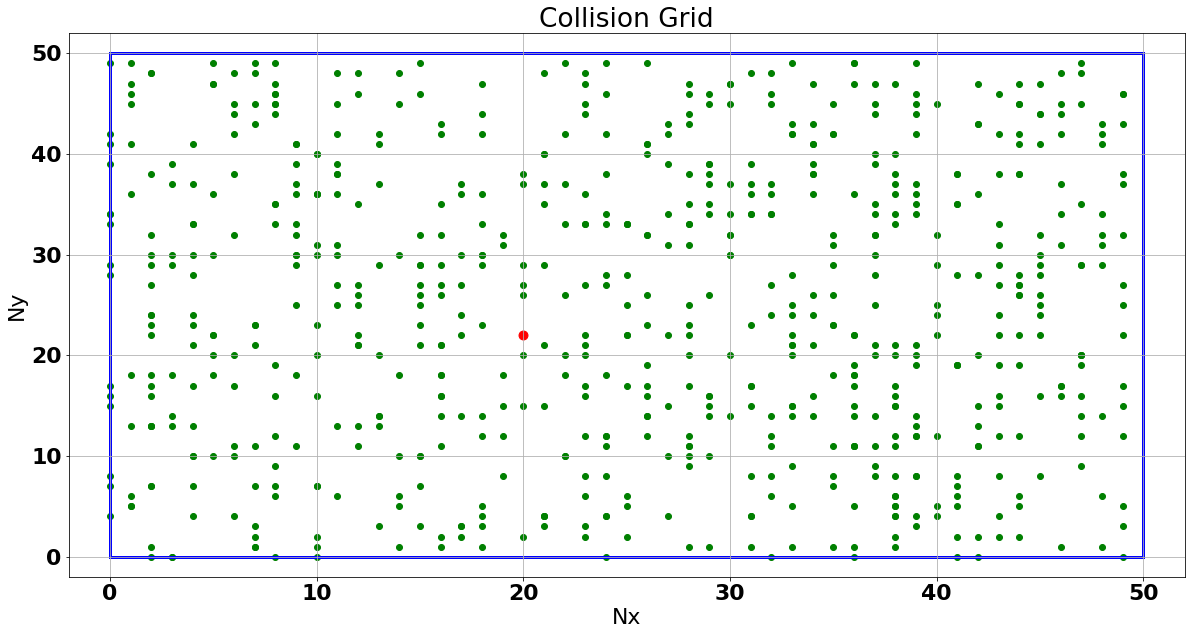

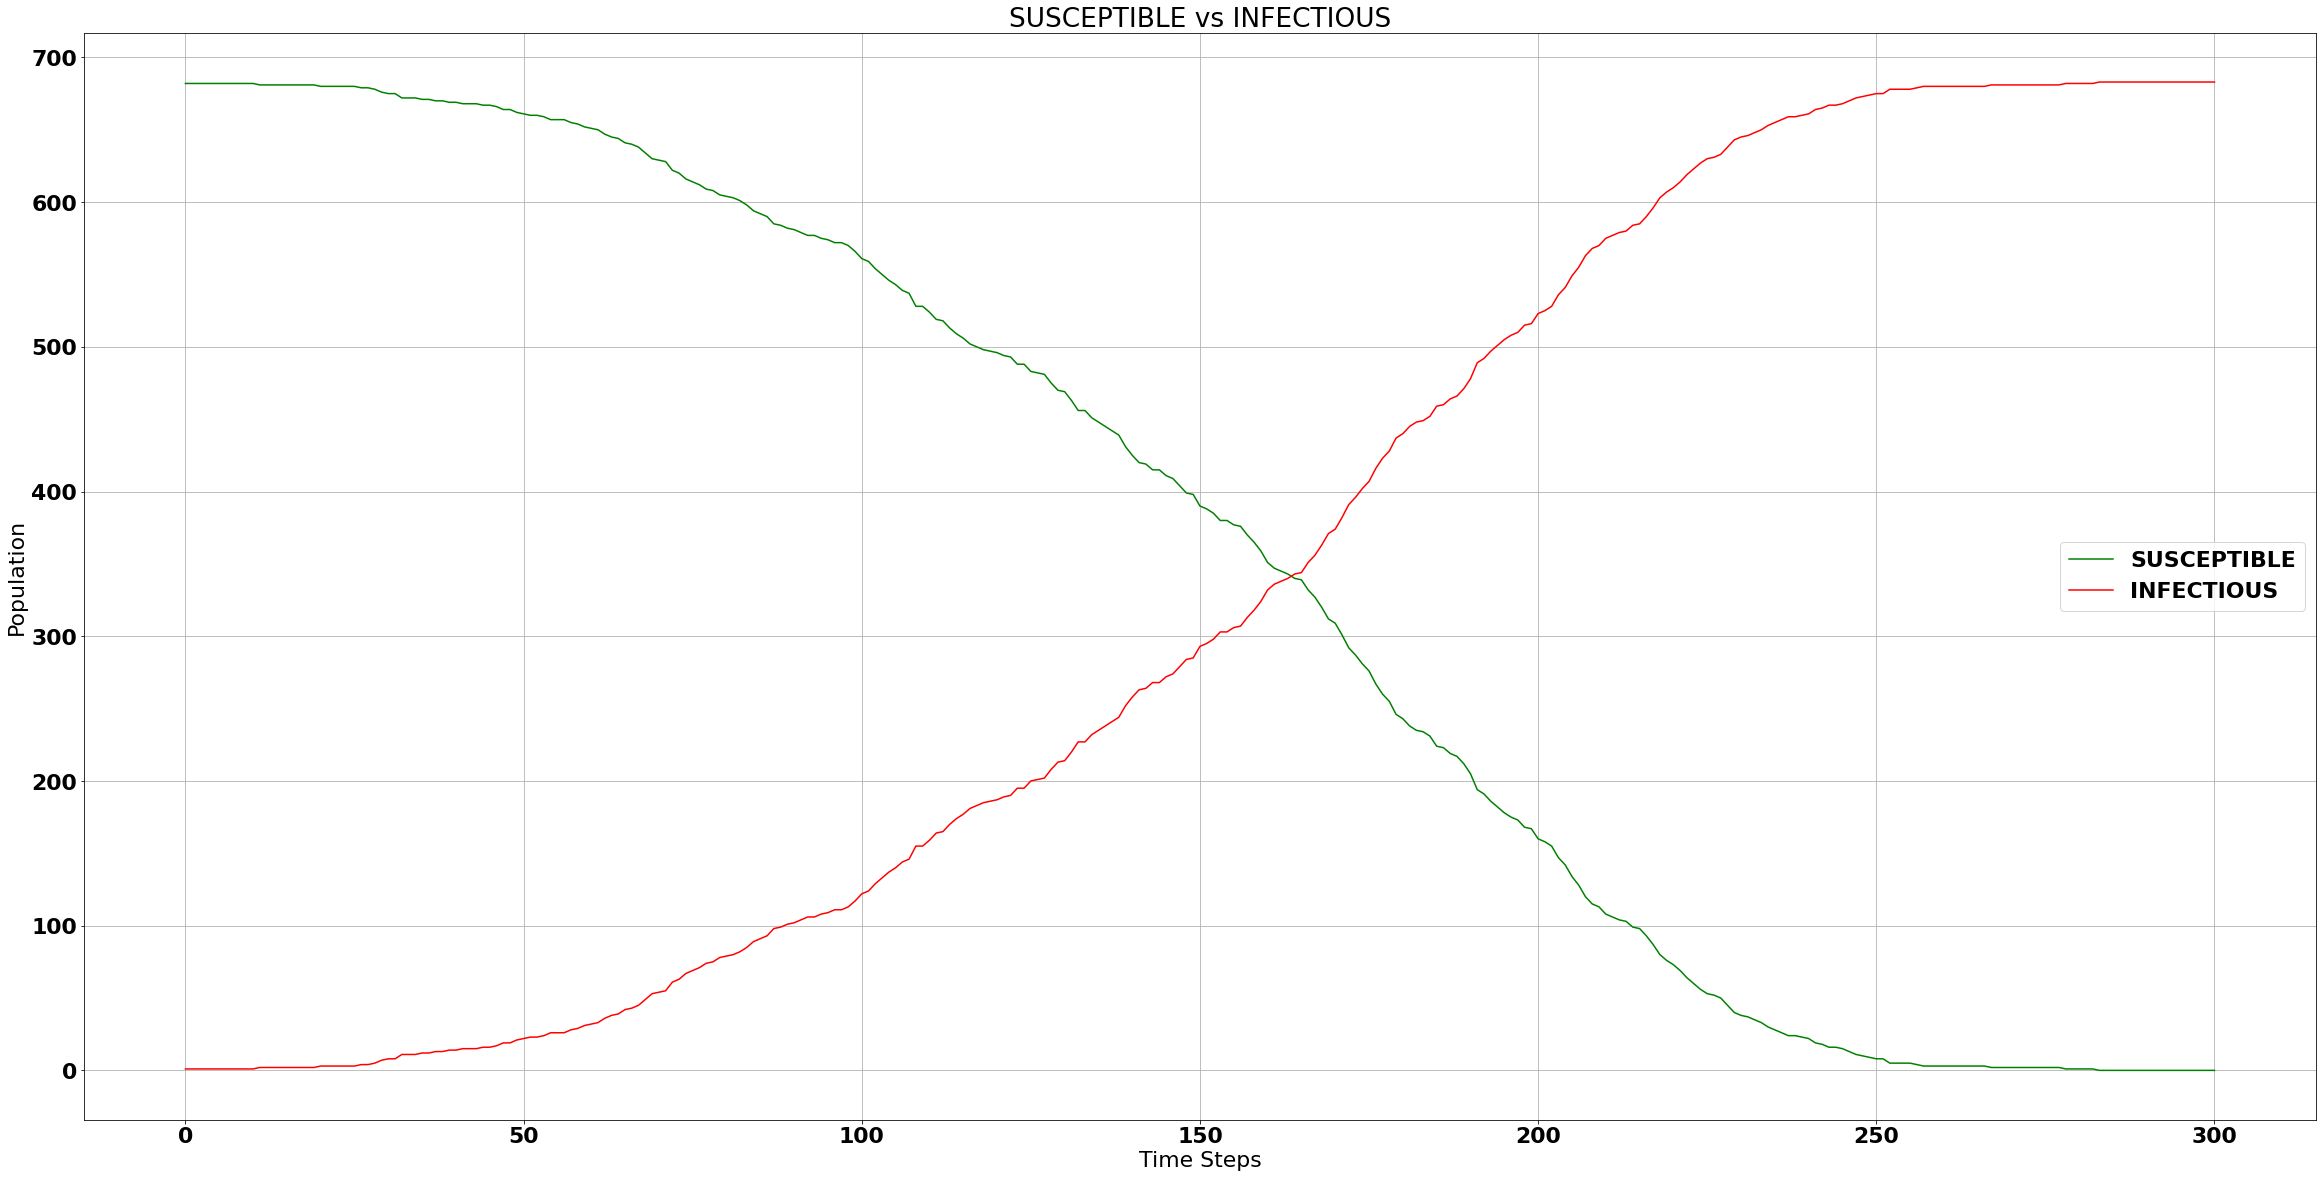

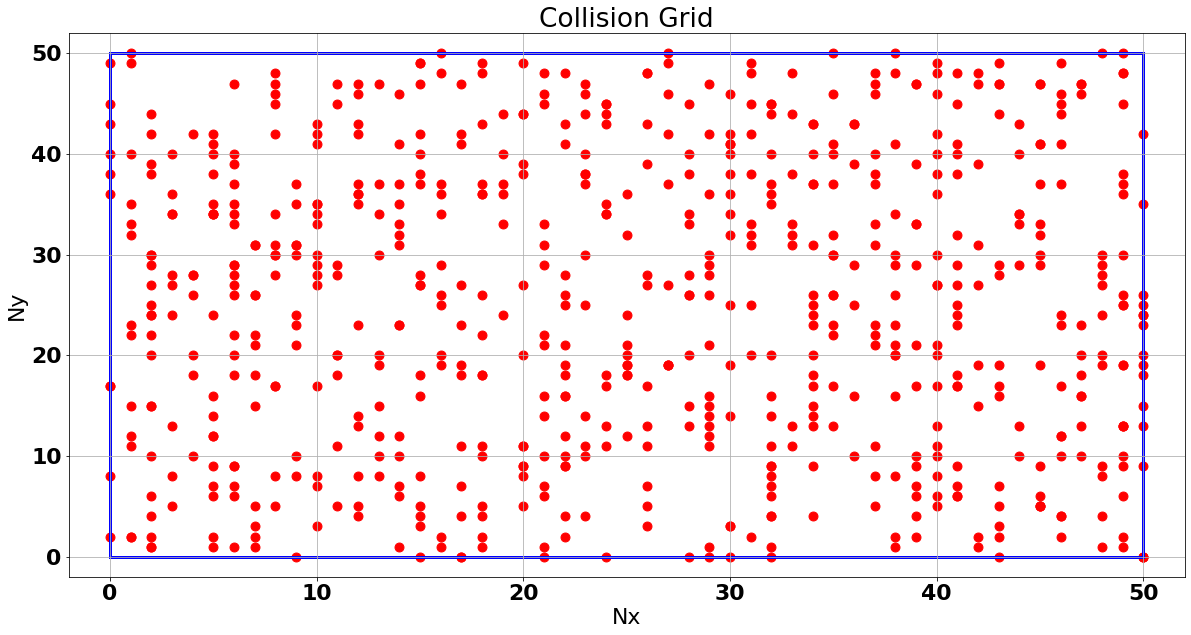

Number of survivors at the end of 300  time steps, are: 0
Number of infected at the end of 300  time steps, are: 683
Simulation Completed! , Resetting Class Instance....
Reset subroutine called !
Reset subroutine Finished !
8.19 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
%%timeit -n1 -r1

R1 = RandomWalkEpidemicSimulator(population_size = 683,ts_ = 300)
R1.simulateEx1()

<p style="text-align:justify">Both "Collision Grid" scatter plots represent the positions of every individual at time zero and at time 300hours. Red dots represent the infected individuals and the green dots represent Susceptible individuals. After Random_Walk simulation, at 300hours, every individual is infected, and none is healthy. The Susceptible vs Infected graph illustrates that how the number of infected and Susceptible individuals change their states over 300 time steps.

In [49]:
gc.collect() # garbage collector is used to free up the memory

20

# Exercise 2

<p style="text-align:justify">In this exercise, we have determined certain parameters (sample mean and standard deviation) using Monte-Carlo and have compared the SI model after changing certain condition like initial number of infectious for 100 simulations to see how individuals change their state from healthy to infected. This simply means that every time step is computed for 100 time. One thing worth mentioning here is that in results, some people remain uninfected even after designated timestep. We have used "simulateEx2()" which compute the SI model with Monte Carlo simulation for repeated number of times. 

### Part 1

plot_wrt_time_inc_errors called .. 
mean_STD_computation called .. 
move_walkers_repeatedy called .. 
move_walkers_repeatedy finished .. 
mean_STD_computation finished ..


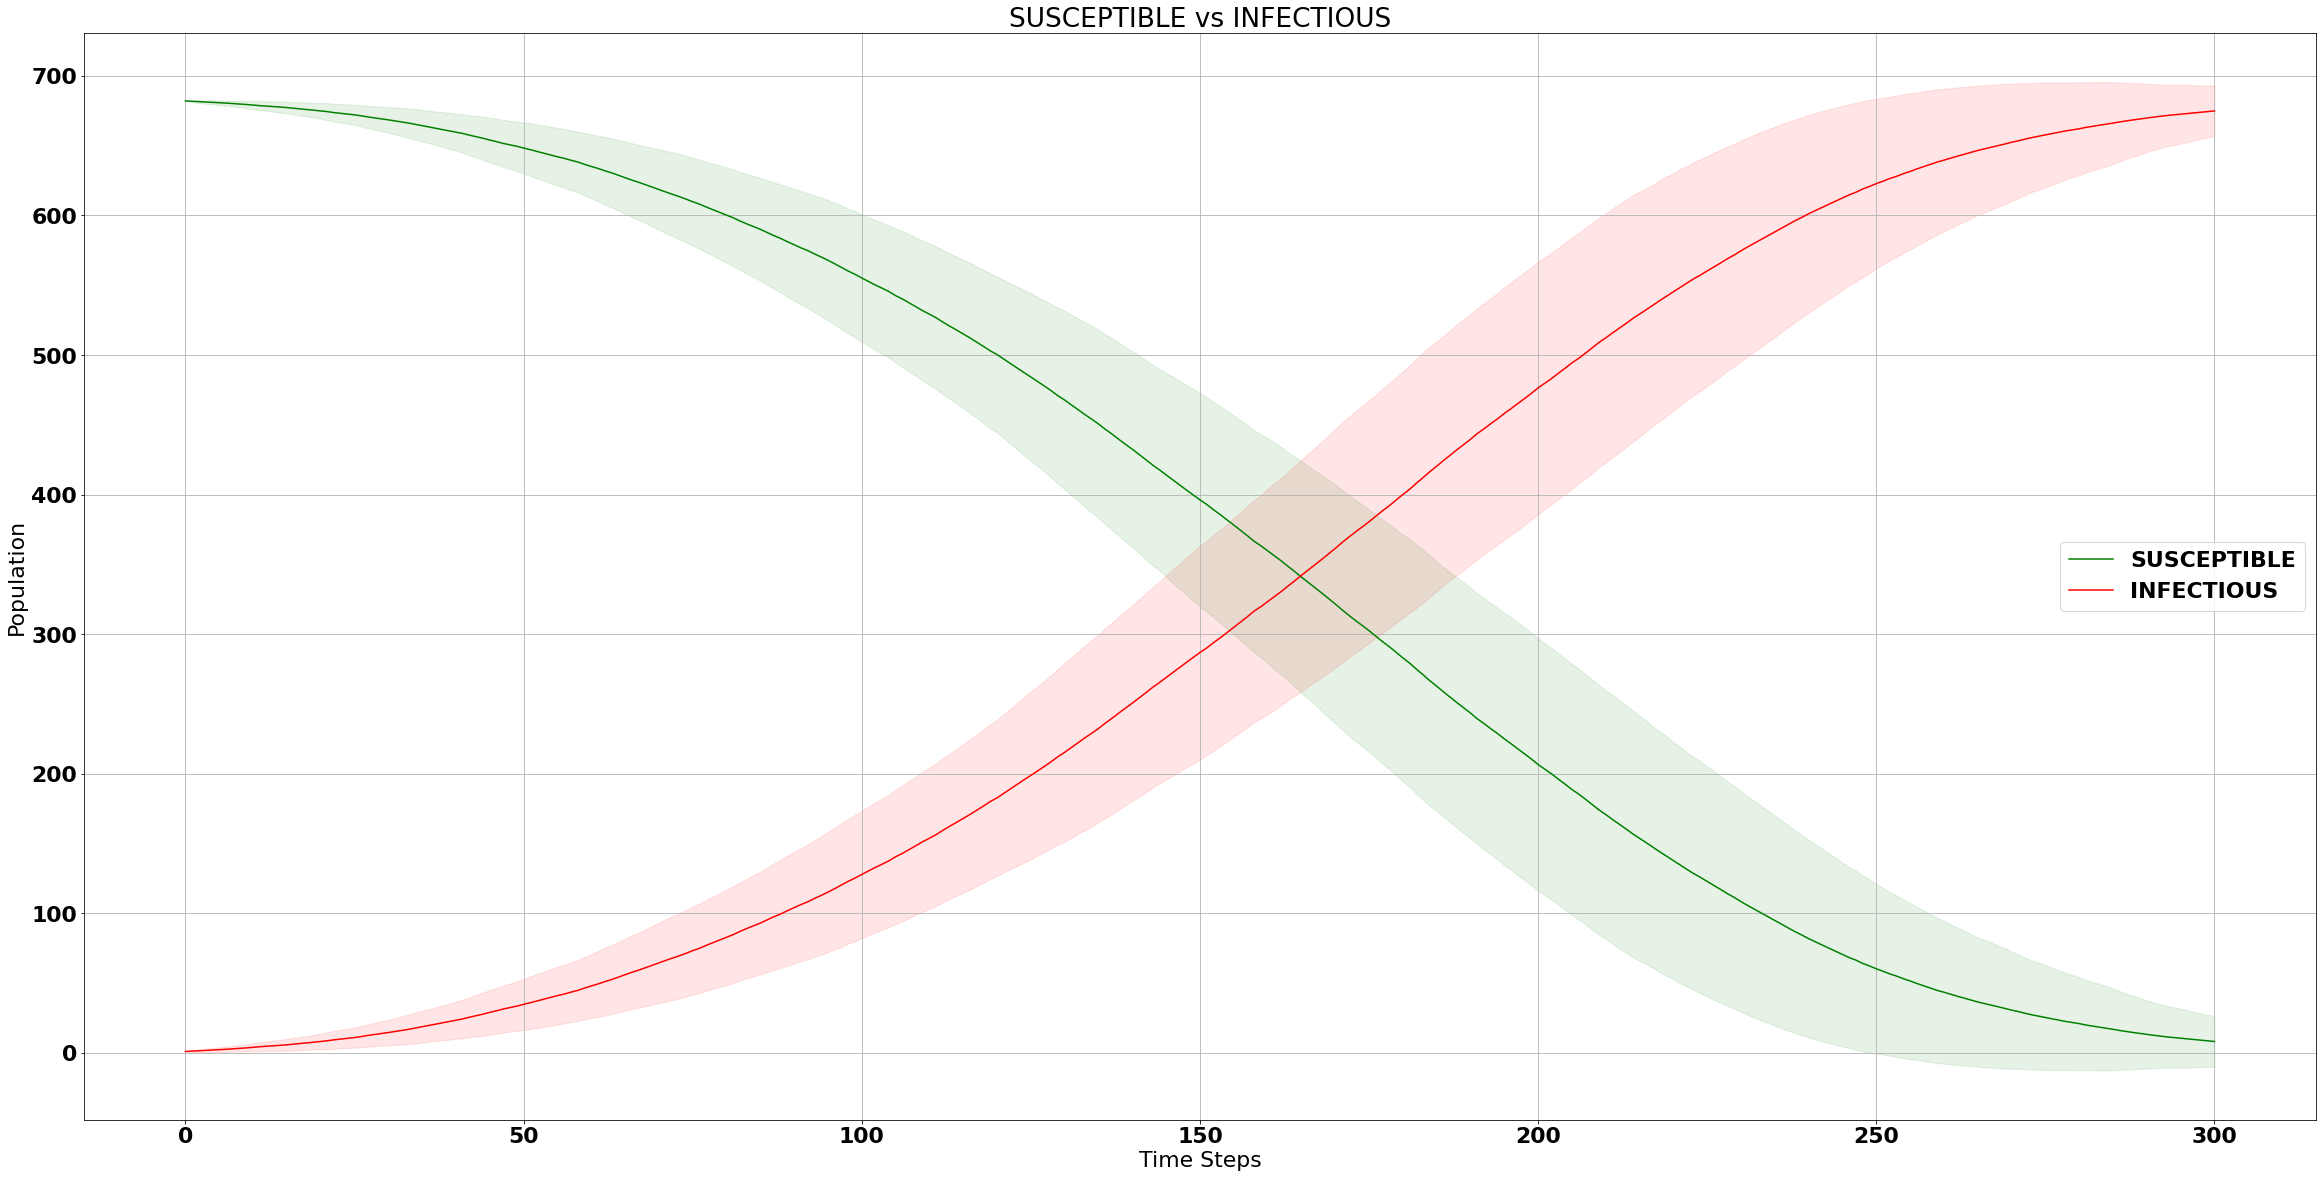

plot_wrt_time_inc_errors finished .. 
Simulation Completed! , Resetting Class Instance....
Reset subroutine called !
Reset subroutine Finished !


In [10]:
%%timeit -n1 -r1

R1a = RandomWalkEpidemicSimulator(population_size = 683,ts_ = 300,repititions = 100)
R1a.simulateEx2()

### Part 2

plot_wrt_time_inc_errors called .. 
mean_STD_computation called .. 
move_walkers_repeatedy called .. 
move_walkers_repeatedy finished .. 
mean_STD_computation finished ..


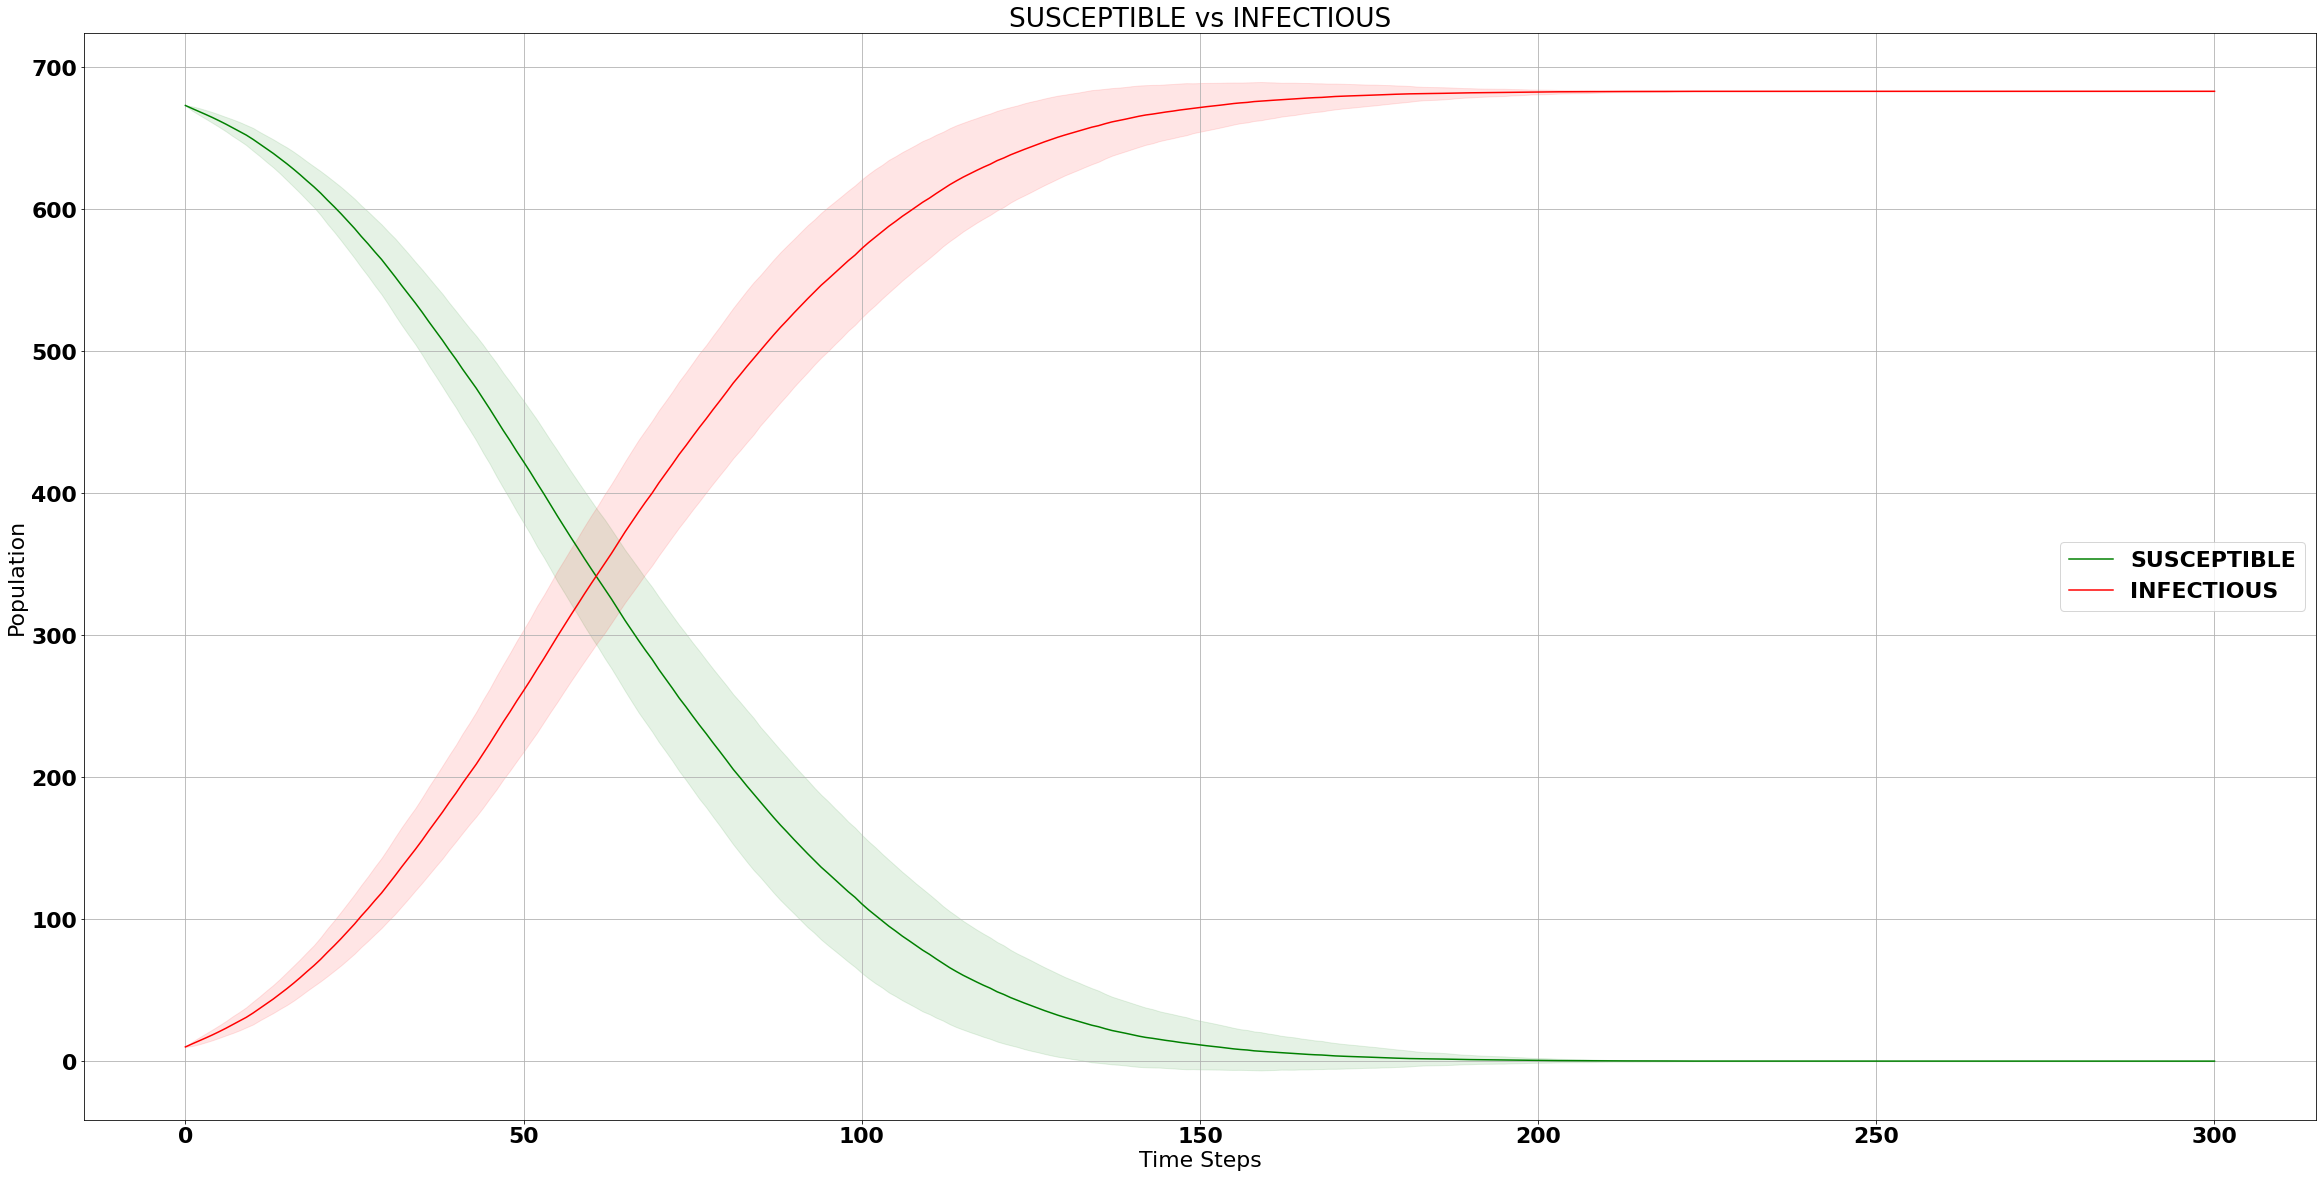

plot_wrt_time_inc_errors finished .. 
Simulation Completed! , Resetting Class Instance....
Reset subroutine called !
Reset subroutine Finished !
12min 54s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [11]:
%%timeit -n1 -r1

R1b = RandomWalkEpidemicSimulator(population_size = 683,no_init_infected=10,ts_ = 300,repititions = 100)
R1b.simulateEx2()

<p style="text-align:justify"> The thin sharp line represents the mean value and the shaded area represents the standard deviation. The interpretation of first graph and second graph of this exercise is that number of susceptible and number of infectious have more deviation from mean value in middle area and the graph line is thin sharp mean line in start and towards end which is indicating of less at start and end and more deviation for middle area where the red and green lines are shaded. The number of Susceptible decreases and number of infectious increases along with time steps. It can also be noted that increasing number of infectious in second part decreases the shaded area which means that the deviation decreases although total population gets infected quiet earlier (in 50-100 time step, S and I intersects) as compared to first graph (in 150-200 time step, S and I intersects) where number of infectious were one initially. 

In [12]:
gc.collect()

3133

### Part 3 

<p style="text-align:justify"> In part 3 of this exercise, we changed the value of beta from 0 to 1 with a stepsize of 0.000001, comparing the analytical solution with I_MEAN (one step at a time) where I_MEAN is found by MCS and then keeping/storing the value of beta in a beta array at which the difference of I(t) and I_MEAN is minimum. After that using this beta array from analytical formula, a comparison between analytical solution and MC simulation has been done below.

For calculation of beta function, we used analytical solution(equation 1) at each time step.

\begin{align}
I(t)&=\frac{N}{1+\frac{S_0}{I_0}\exp(-\beta{t})}\,,
\tag{1}
\end{align}


#### Comparison with part 1

plot_wrt_time_inc_errors called .. 
mean_STD_computation called .. 
move_walkers_repeatedy called .. 
move_walkers_repeatedy finished .. 
mean_STD_computation finished ..
Calculating Analytical Solution ..


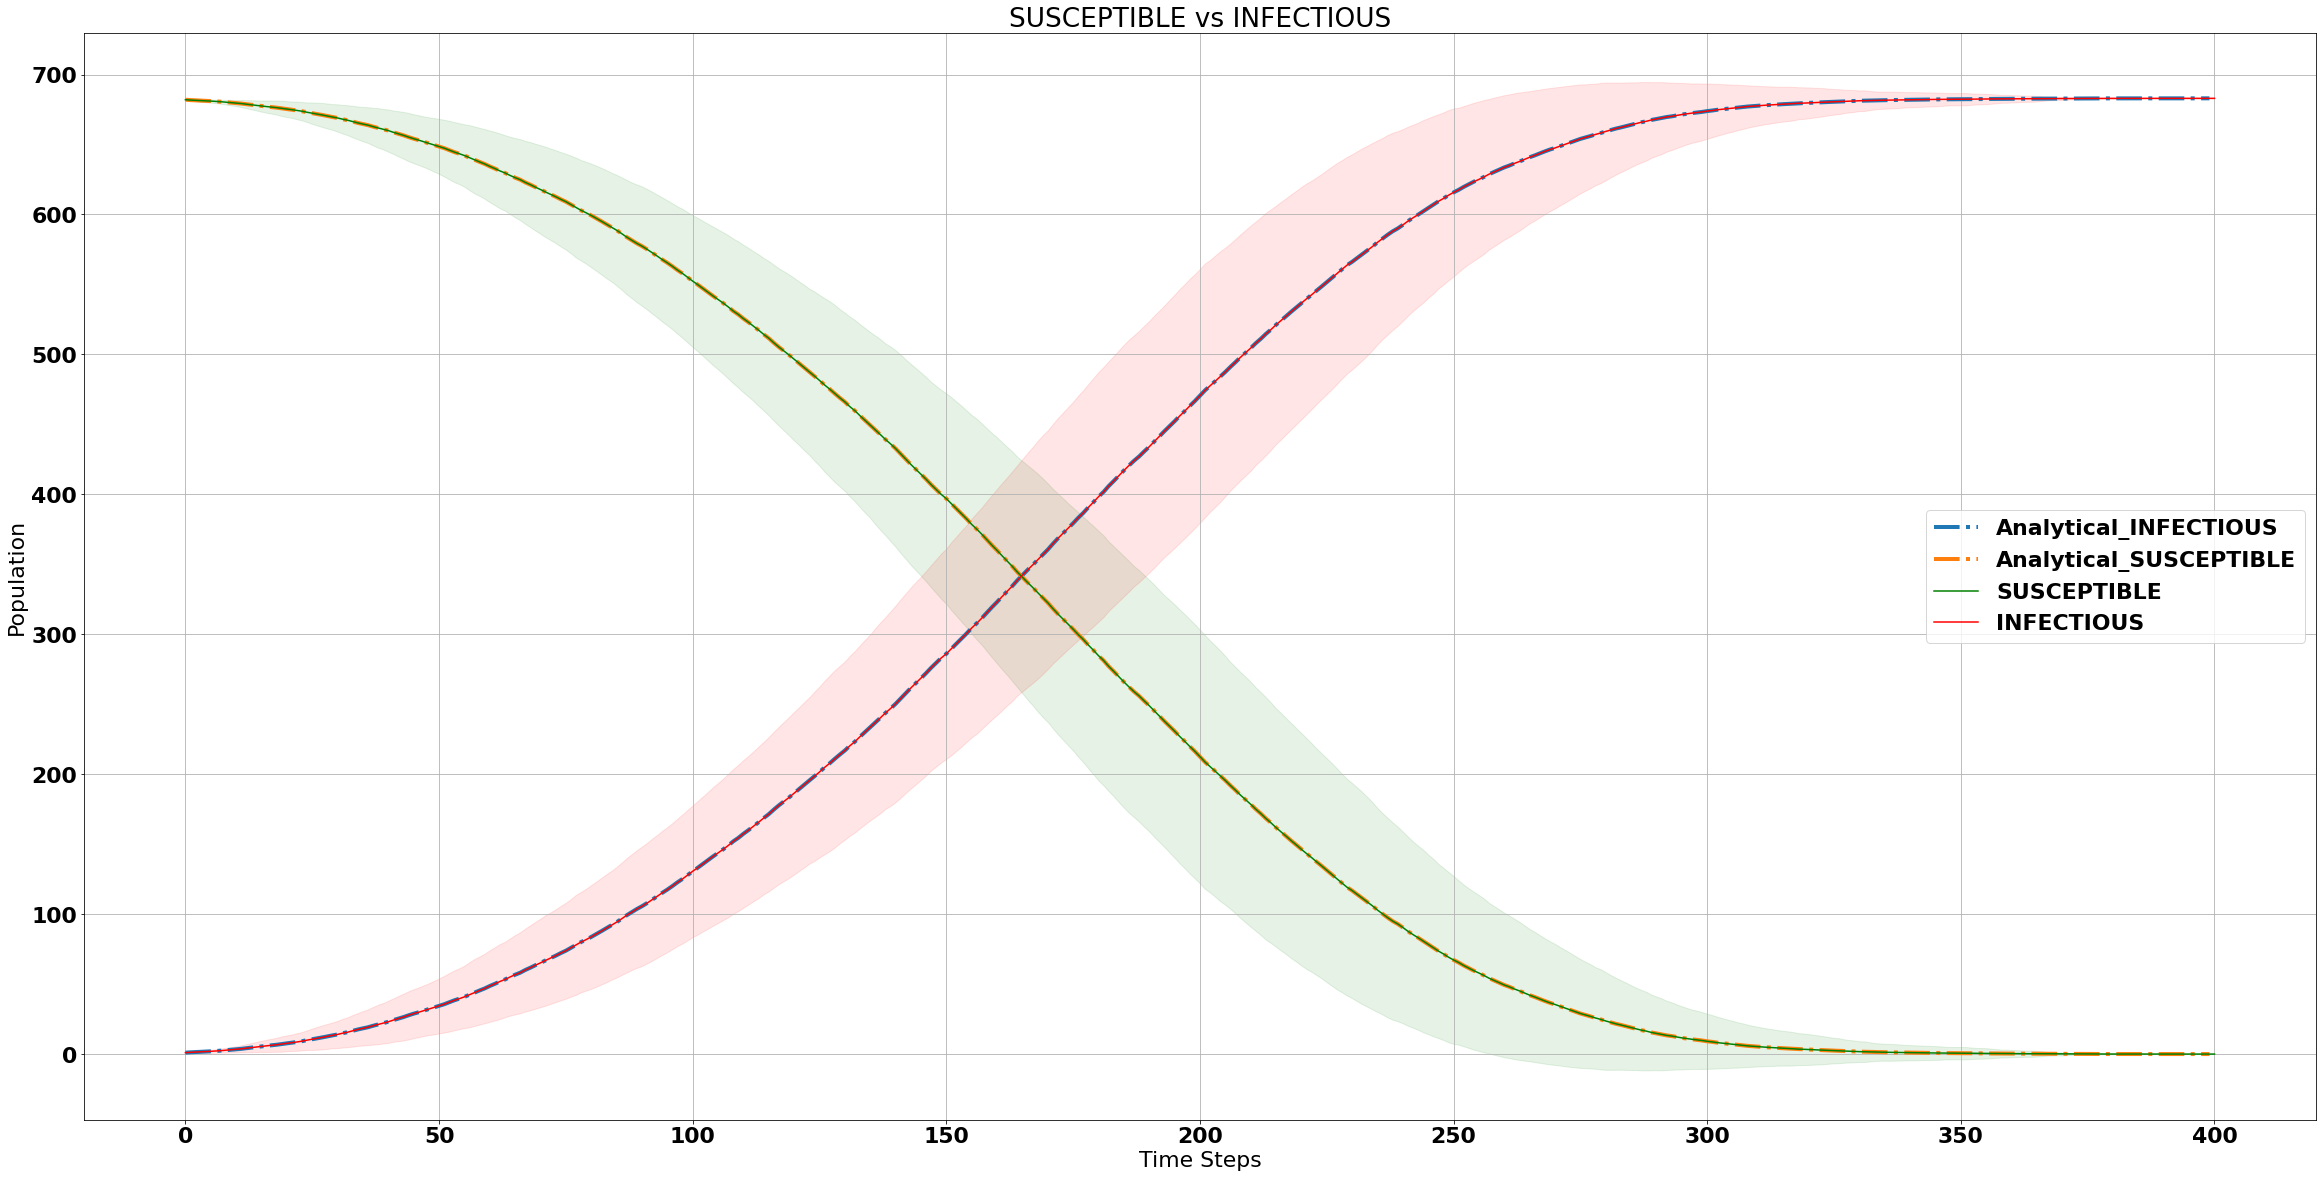

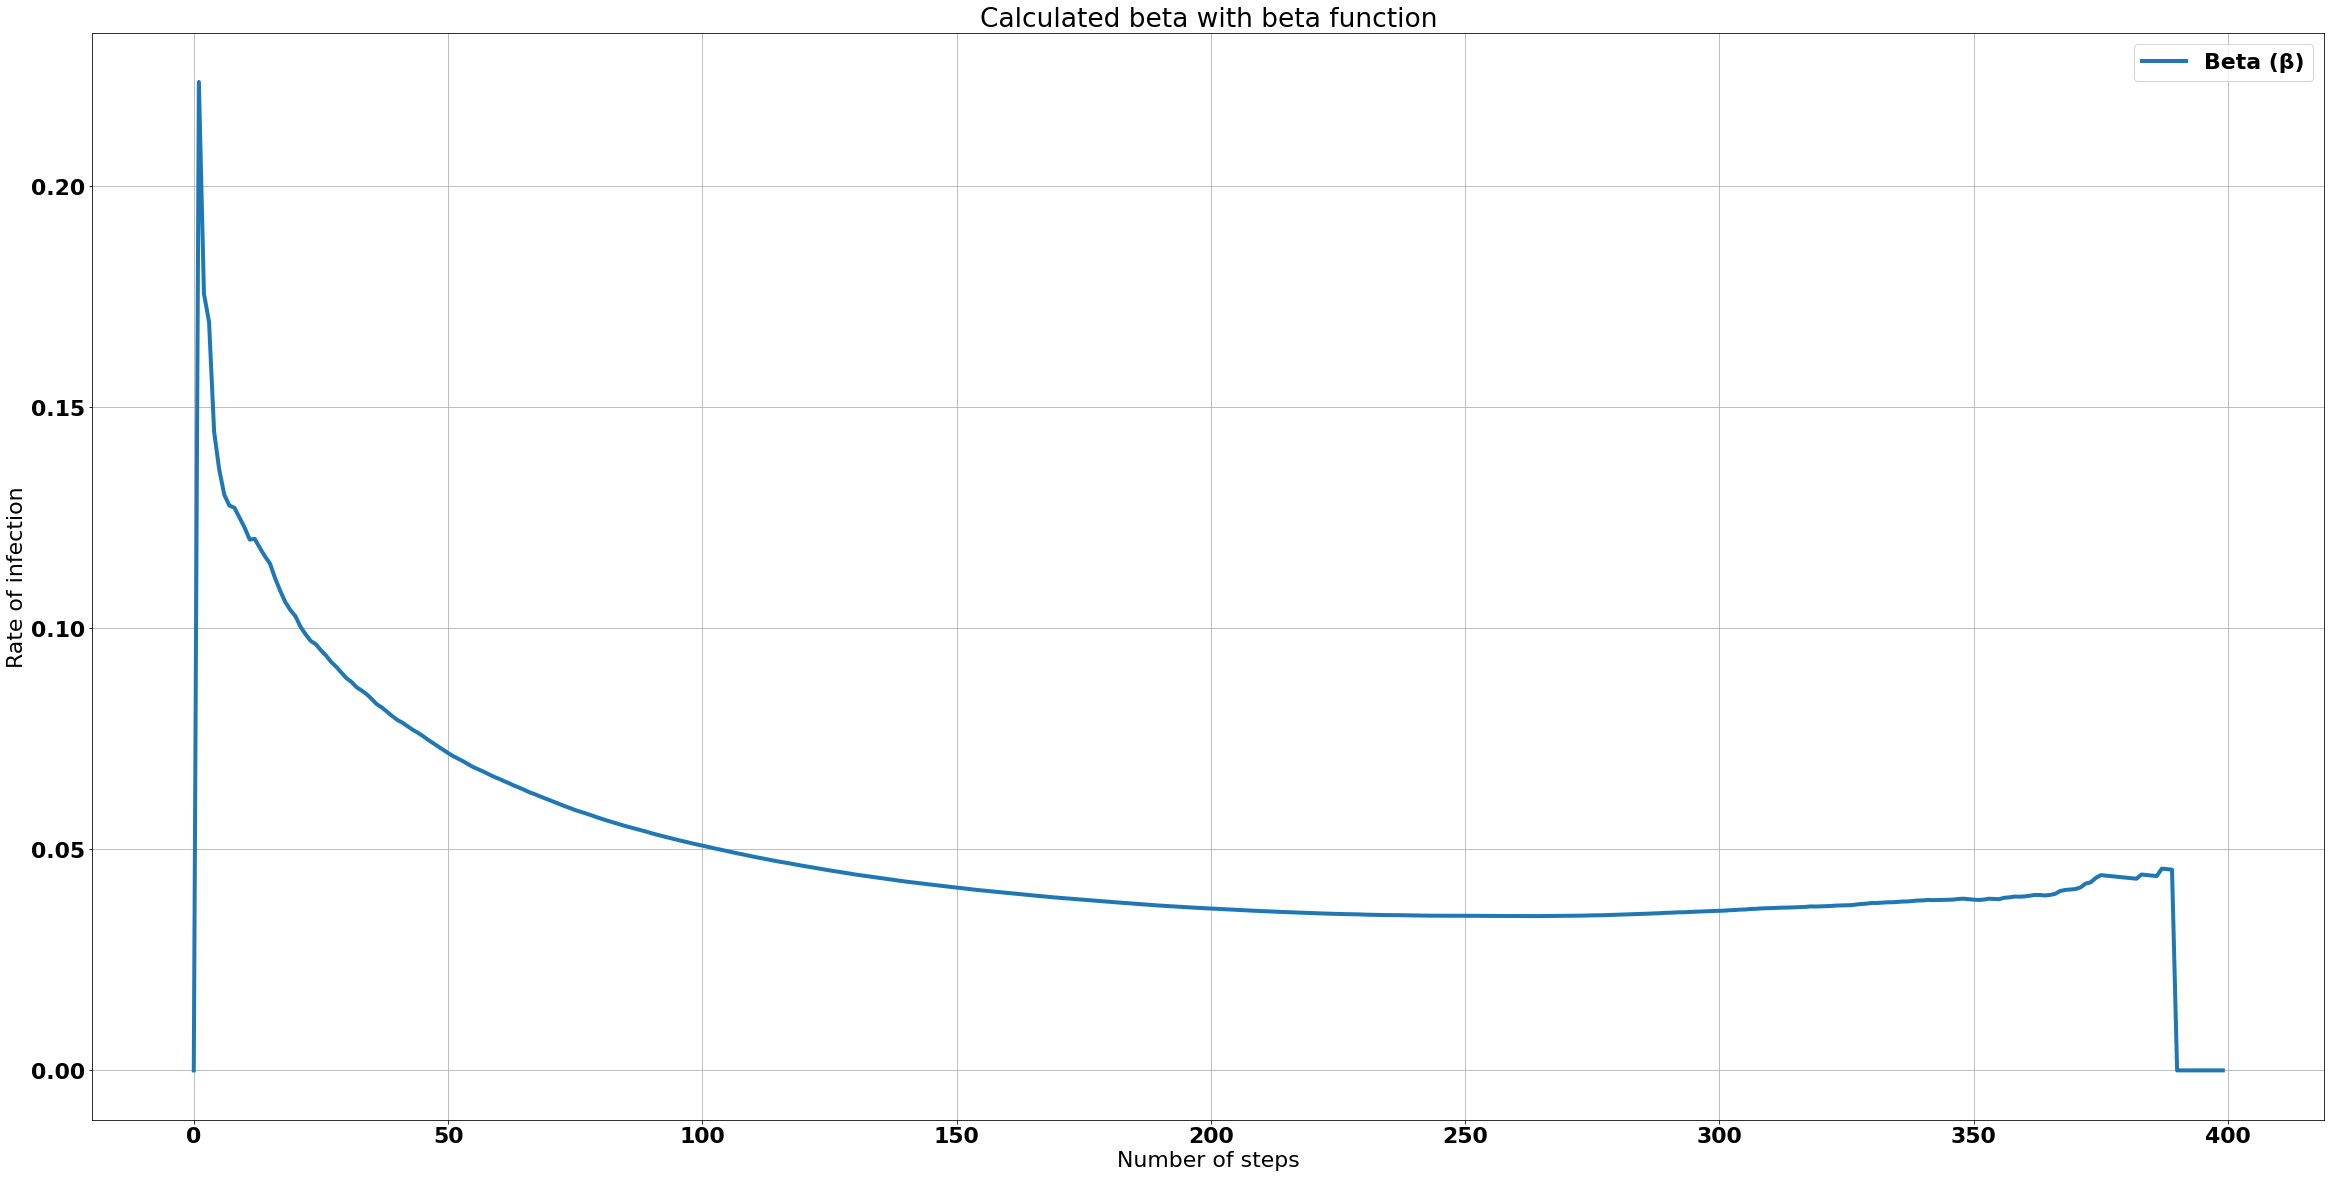

plot_wrt_time_inc_errors finished .. 
Simulation Completed! , Resetting Class Instance....
Reset subroutine called !
Reset subroutine Finished !
13min 20s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [16]:
%%timeit -n1 -r1

R2c = RandomWalkEpidemicSimulator(population_size = 683,ts_ = 400,repititions = 100)
R2c.simulateEx2(analytical= True)

#### Comparison with part 2

plot_wrt_time_inc_errors called .. 
mean_STD_computation called .. 
move_walkers_repeatedy called .. 
move_walkers_repeatedy finished .. 
mean_STD_computation finished ..
Calculating Analytical Solution ..


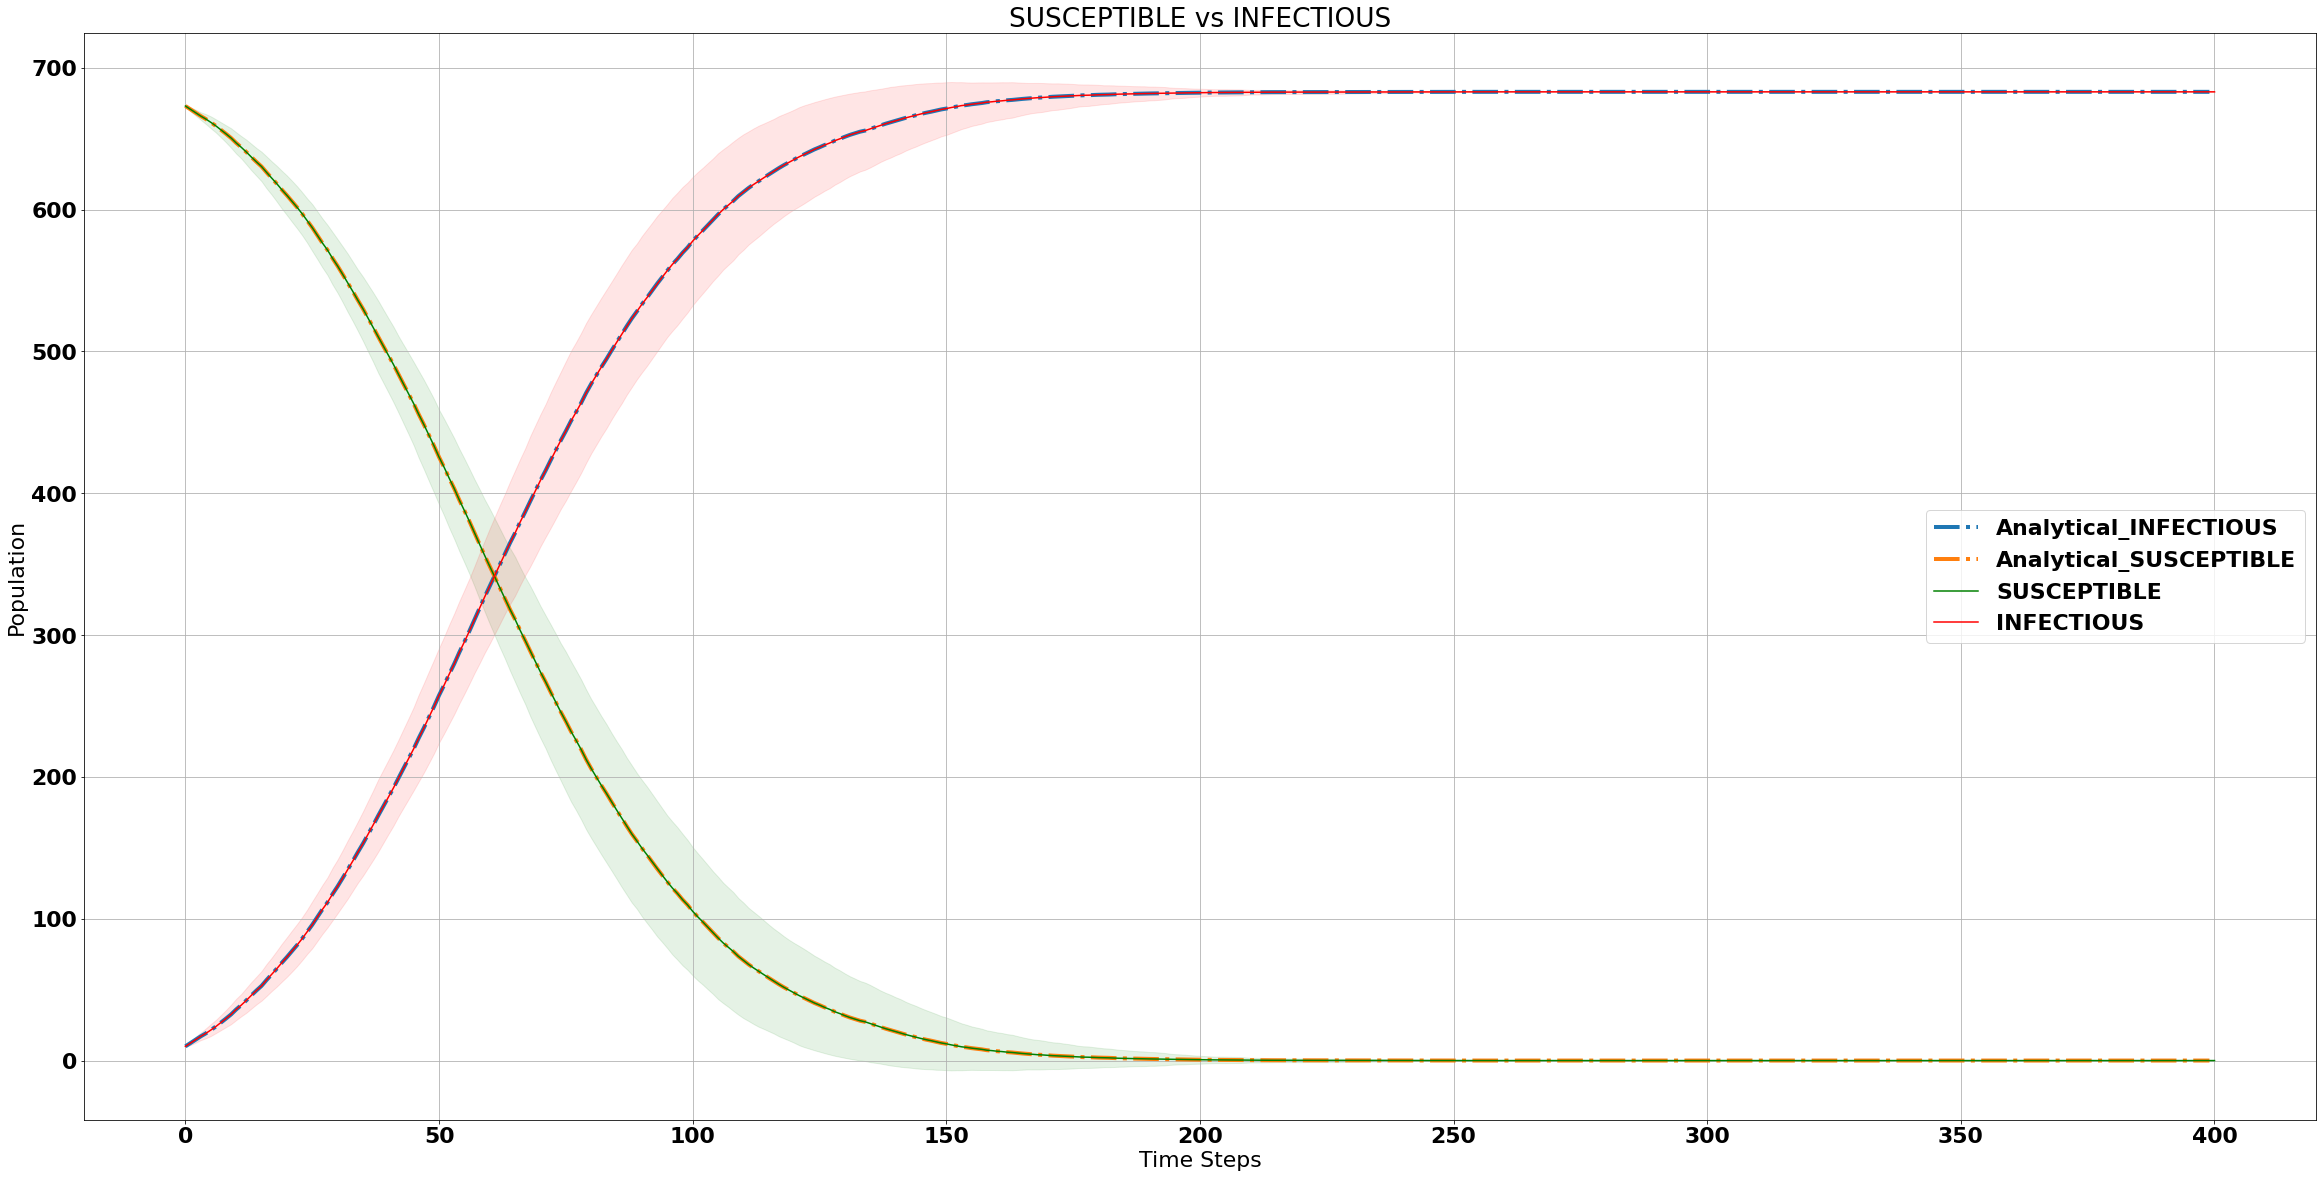

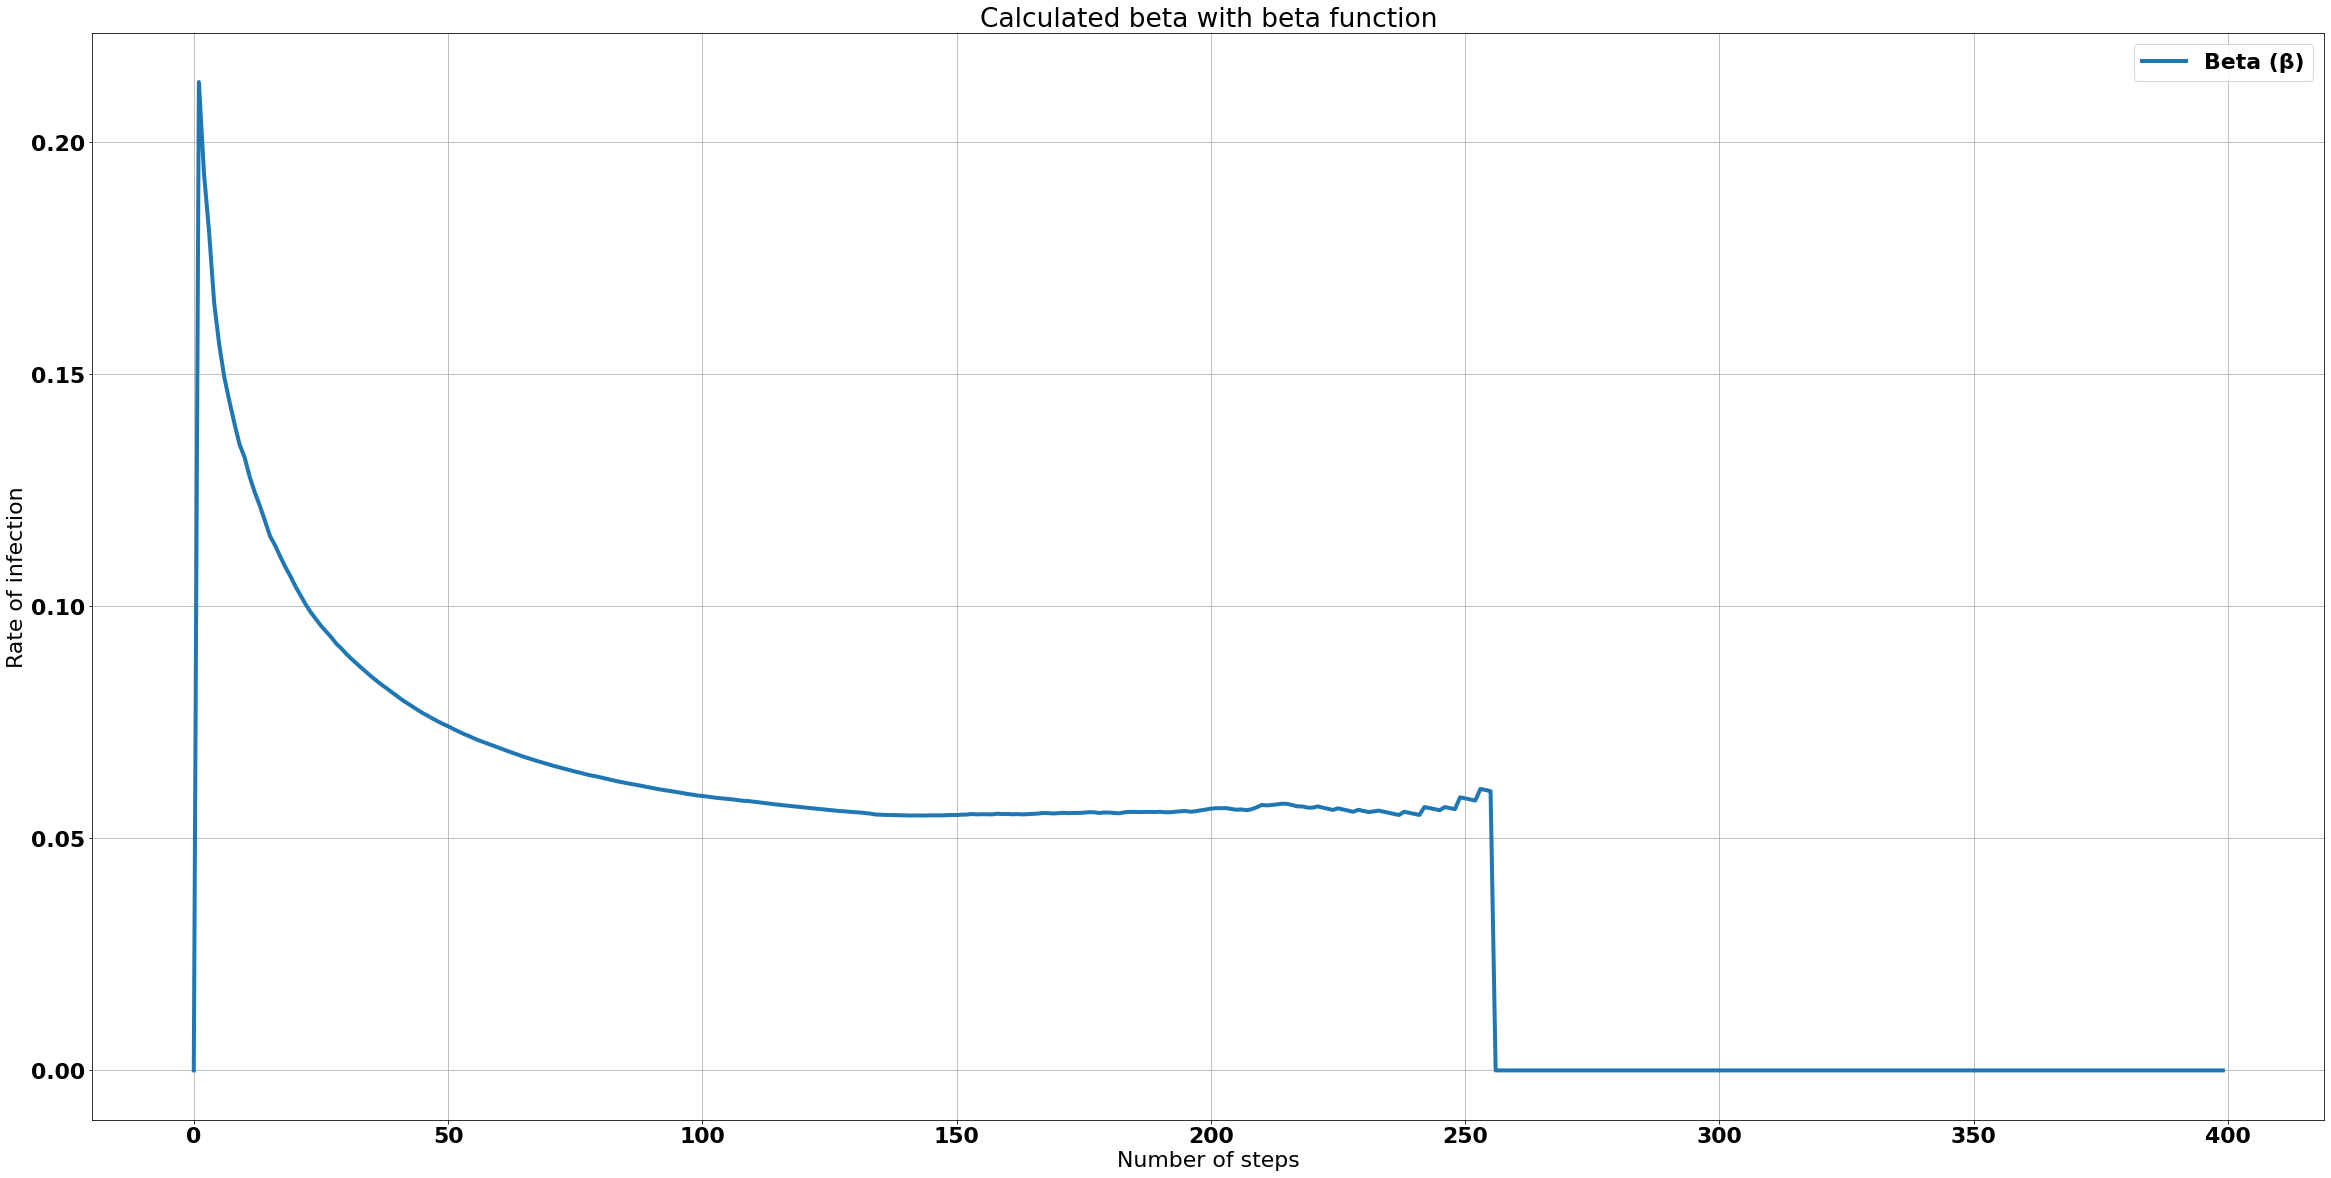

plot_wrt_time_inc_errors finished .. 
Simulation Completed! , Resetting Class Instance....
Reset subroutine called !
Reset subroutine Finished !
19min 17s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [17]:
%%timeit -n1 -r1

R2c = RandomWalkEpidemicSimulator(population_size = 683,no_init_infected=10, ts_ = 400,repititions = 100)
R2c.simulateEx2(analytical= True)

<p style="text-align:justify">We are comparing the results of first two parts. The graph named as "Calculated Beta with Beta function" is the Beta (rate of infection) value (calculated from analytical solution just like project 3). Graphs tell us that values of I_MEAN and S_MEAN are same with analytical solution using this beta function.
It can also be seen that Beta is being pushed to zero in both these plots (after time step 380 for part 1 and after time step 250 for part 2). This is the time when susceptible become zero which means if all the Susceptible are infected, then no more infection can be spread in population as all are already infected. If we do not push the beta to zero, we will have spikes in beta value i.e. beta goes to infinity as shown in the derivation below. 
    
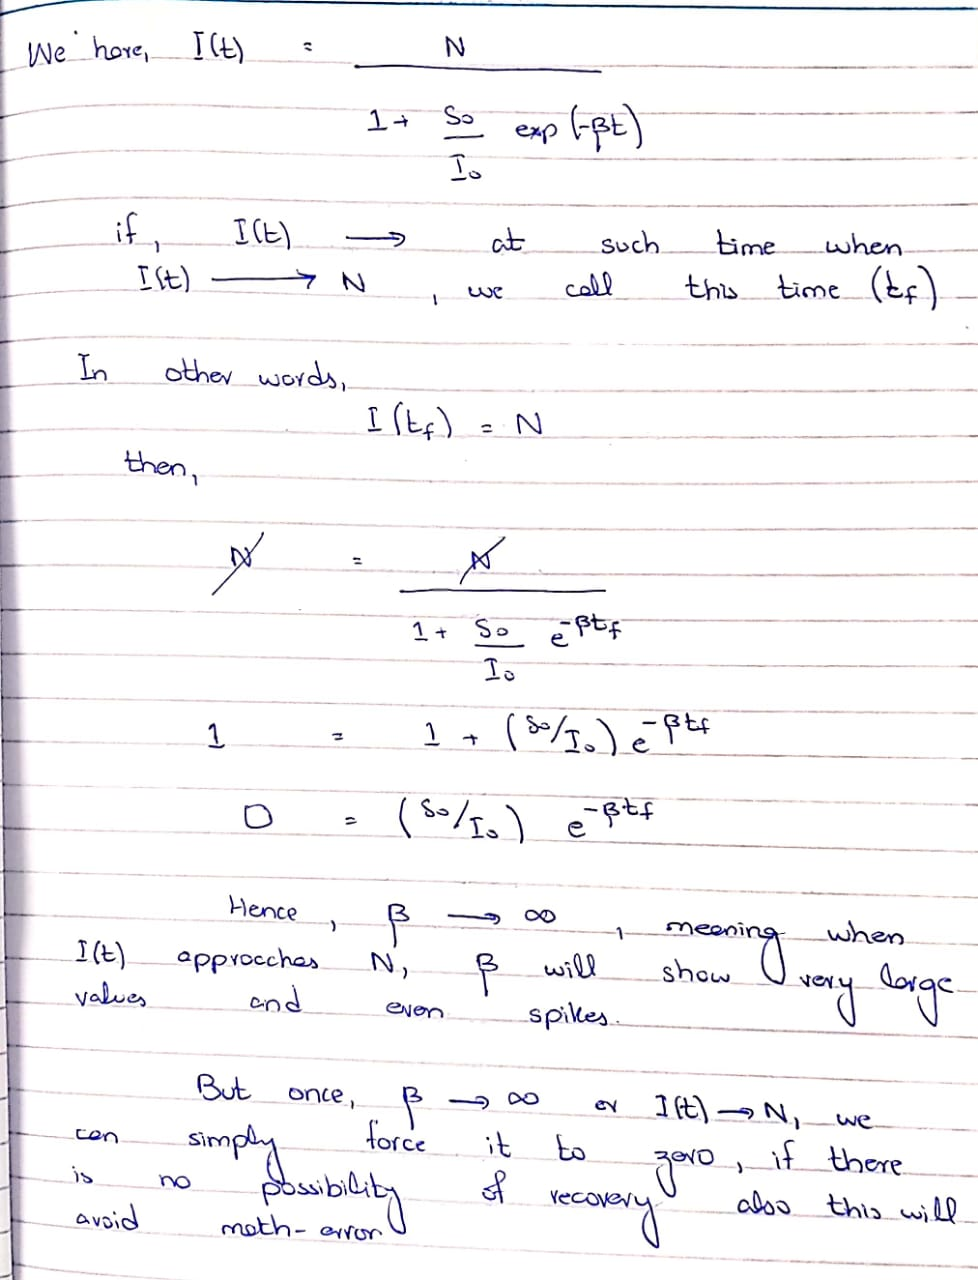
    
<p style="text-align:justify"><b>note: In monte-carlo vs analytical comparison graphs, we can see that no. of suseptibles falls to zero earlier than that when beta is pushed to zero, this is because the no. susceptibles are not exactly zero but very close to zero(S=0.4 and I = 682.6) and then become exact zero at later time where we have pushed the beta to zero. 

In [18]:
gc.collect()

6389

# Exercise 3

<p style="text-align:justify">It is concerned with estimating the parameters effecting the disease outbreak which is 𝛽 (rate of infection) in this case. This is calculated using

\begin{equation}
\beta\cdot\Delta t \approx -\frac{(S(t)-S(t-\Delta t))N}{S(t)I(t)},
\tag{4}
\end{equation}

<p style="text-align:justify">From our estimated figures of S and I at each time step. After this mean and median of the 𝛽 value is compared with previous 𝛽 values. As we proceed further, we have divided the population into two groups of people based on their ages. One is young and the other is old. All of population is split into half and the Random Walk is implemented in such a way that old people have 20 % chance of moving in any direction or staying idle whereas for young population, moving part possibility is same as in previous exercises. With these conditions, we will study the effect of disease transmission in population based on their age group and their chances of interaction. We have forcefully assigned 𝛽=0 at the time step in simulations when no suseptible is left and everyone is infected because if we will not do such, we will get zero error which occur in case when I(t) becomes equal to maximum number of infected people with no susceptible left in which disease could transmit (in equation 1). <b>(proof shown in the derivation above)

### PART 1

mean_STD_computation called .. 
move_walkers_repeatedy called .. 
move_walkers_repeatedy finished .. 
mean_STD_computation finished ..
S and I mean array wrt. time steps ceated


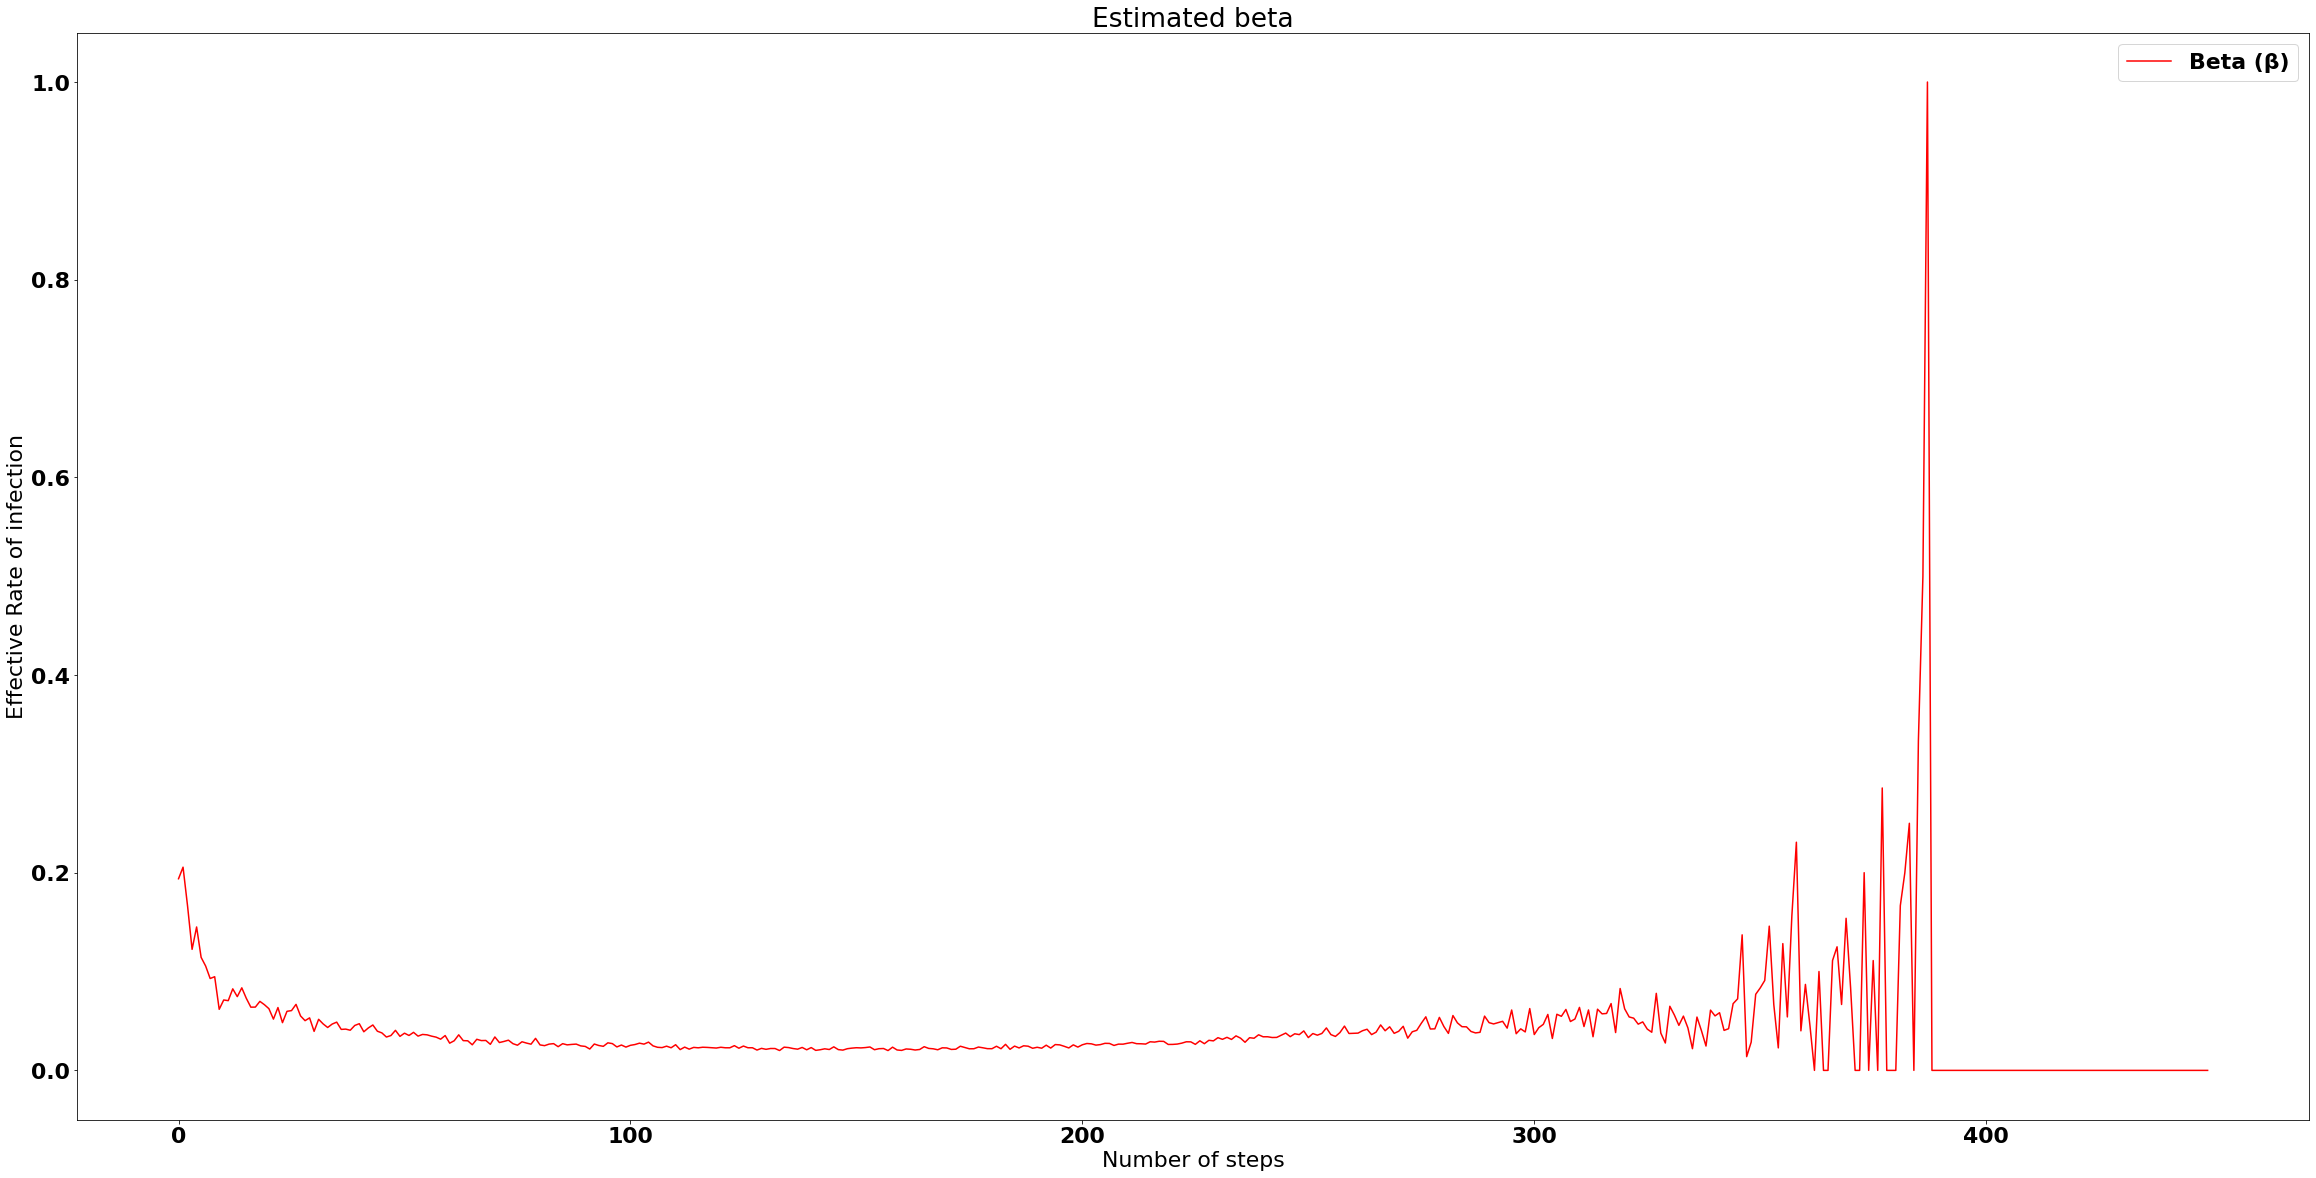

Mean of Beta =  0.04058480879794178 Median of Beta =  0.028206942582819507 

Simulation Completed! , Resetting Class Instance....
Reset subroutine called !
Reset subroutine Finished !
16min 27s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [25]:
%%timeit -n1 -r1
R3 = RandomWalkEpidemicSimulator(population_size = 683,ts_ = 450,repititions = 100)
R3.simulateEx3(betacomp = True,Oldyounganalysis = False,Oldyounganalysis_MonteCarlo = False, betacomp_Oldyoung = False)

### PART 2

Without Monte Carlo .. 


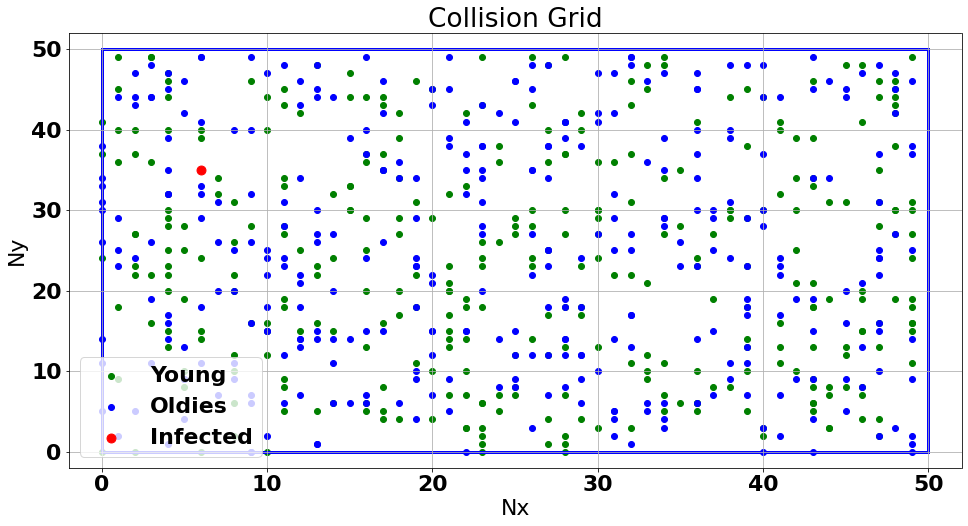

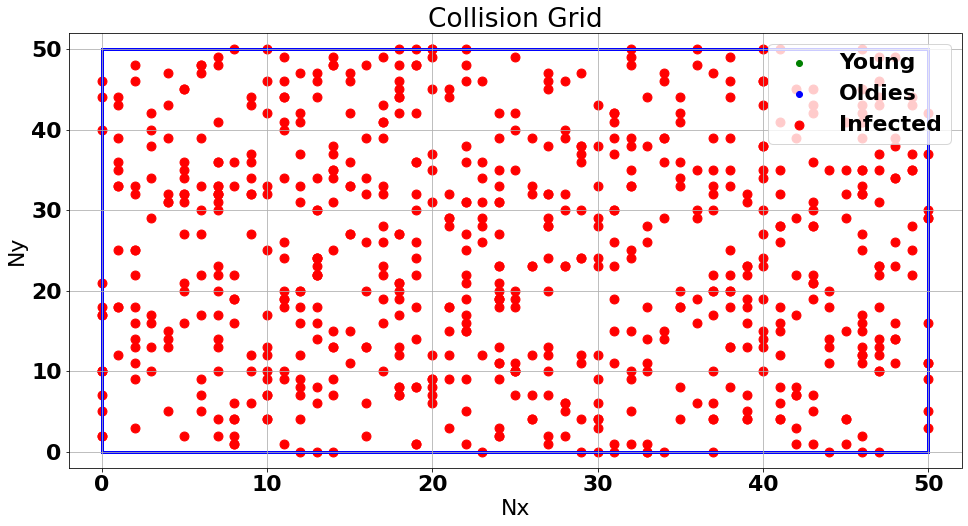

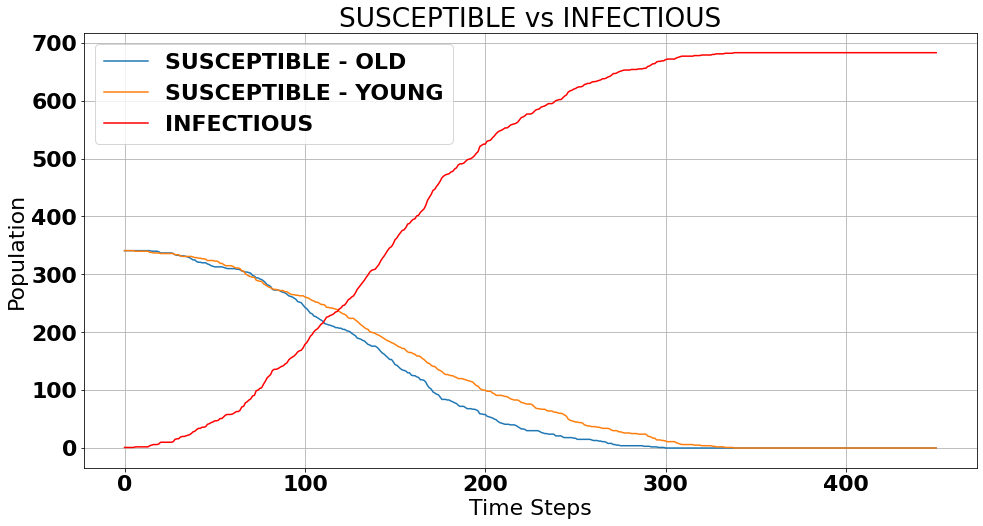

Simulation Completed! , Resetting Class Instance....
Reset subroutine called !
Reset subroutine Finished !
12.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [26]:
%%timeit -n1 -r1
R3b = RandomWalkEpidemicSimulator(nx=50, ny=50,population_size = 683,ts_ = 450,repititions = 100,no_init_infected = 1)
R3b.simulateEx3(betacomp = False,Oldyounganalysis = True,Oldyounganalysis_MonteCarlo = False, betacomp_Oldyoung = False)

With MC ..
OldnYoung_mean_STD_computation called .. 
move_OldnYoung_repeatedy called .. 
move_OldnYoung_repeatedy .. 
OldnYoung_mean_STD_computation ..
plot_wrt_time_inc_errors called .. 


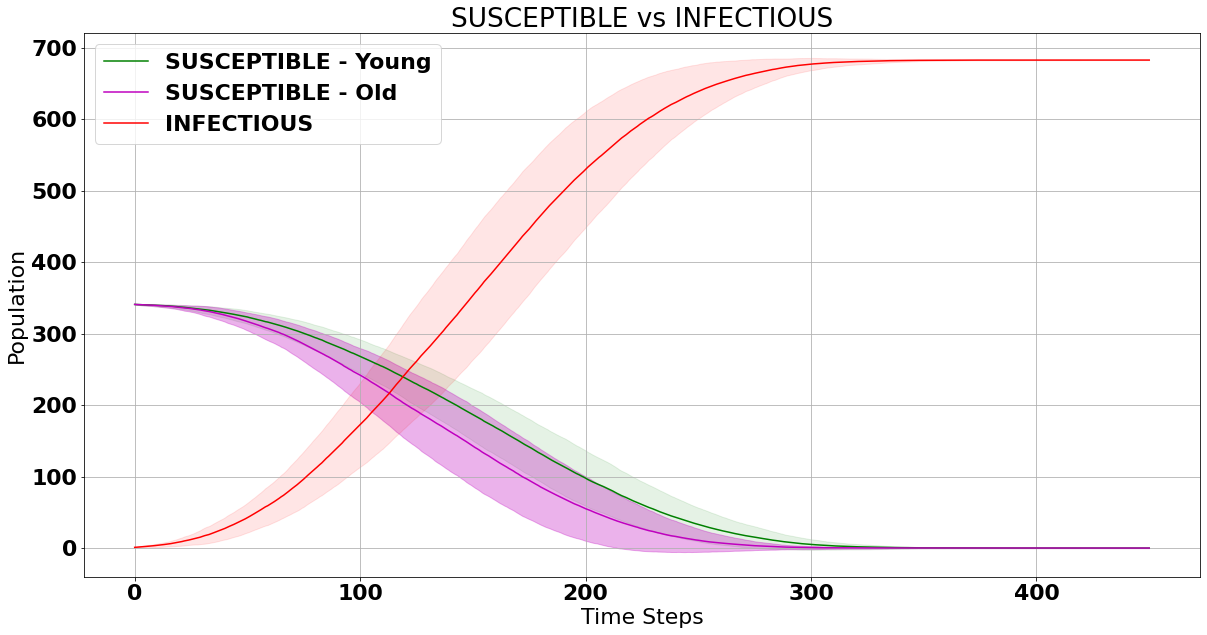

plot_wrt_time_inc_errors finished .. 
Simulation Completed! , Resetting Class Instance....
Reset subroutine called !
Reset subroutine Finished !
16min 31s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [27]:
%%timeit -n1 -r1
R3b = RandomWalkEpidemicSimulator(nx=50, ny=50,population_size = 683,ts_ = 450,repititions = 100,no_init_infected = 1)
R3b.simulateEx3(betacomp = False,Oldyounganalysis = False,Oldyounganalysis_MonteCarlo = True, betacomp_Oldyoung = False)

Beta Computation in Old and Young people scenario
OldnYoung_mean_STD_computation called .. 
move_OldnYoung_repeatedy called .. 
move_OldnYoung_repeatedy .. 
OldnYoung_mean_STD_computation ..
S and I mean array wrt. time steps ceated
Mean of Beta =  0.04073616278597132 Median of Beta =  0.028306615171227706 



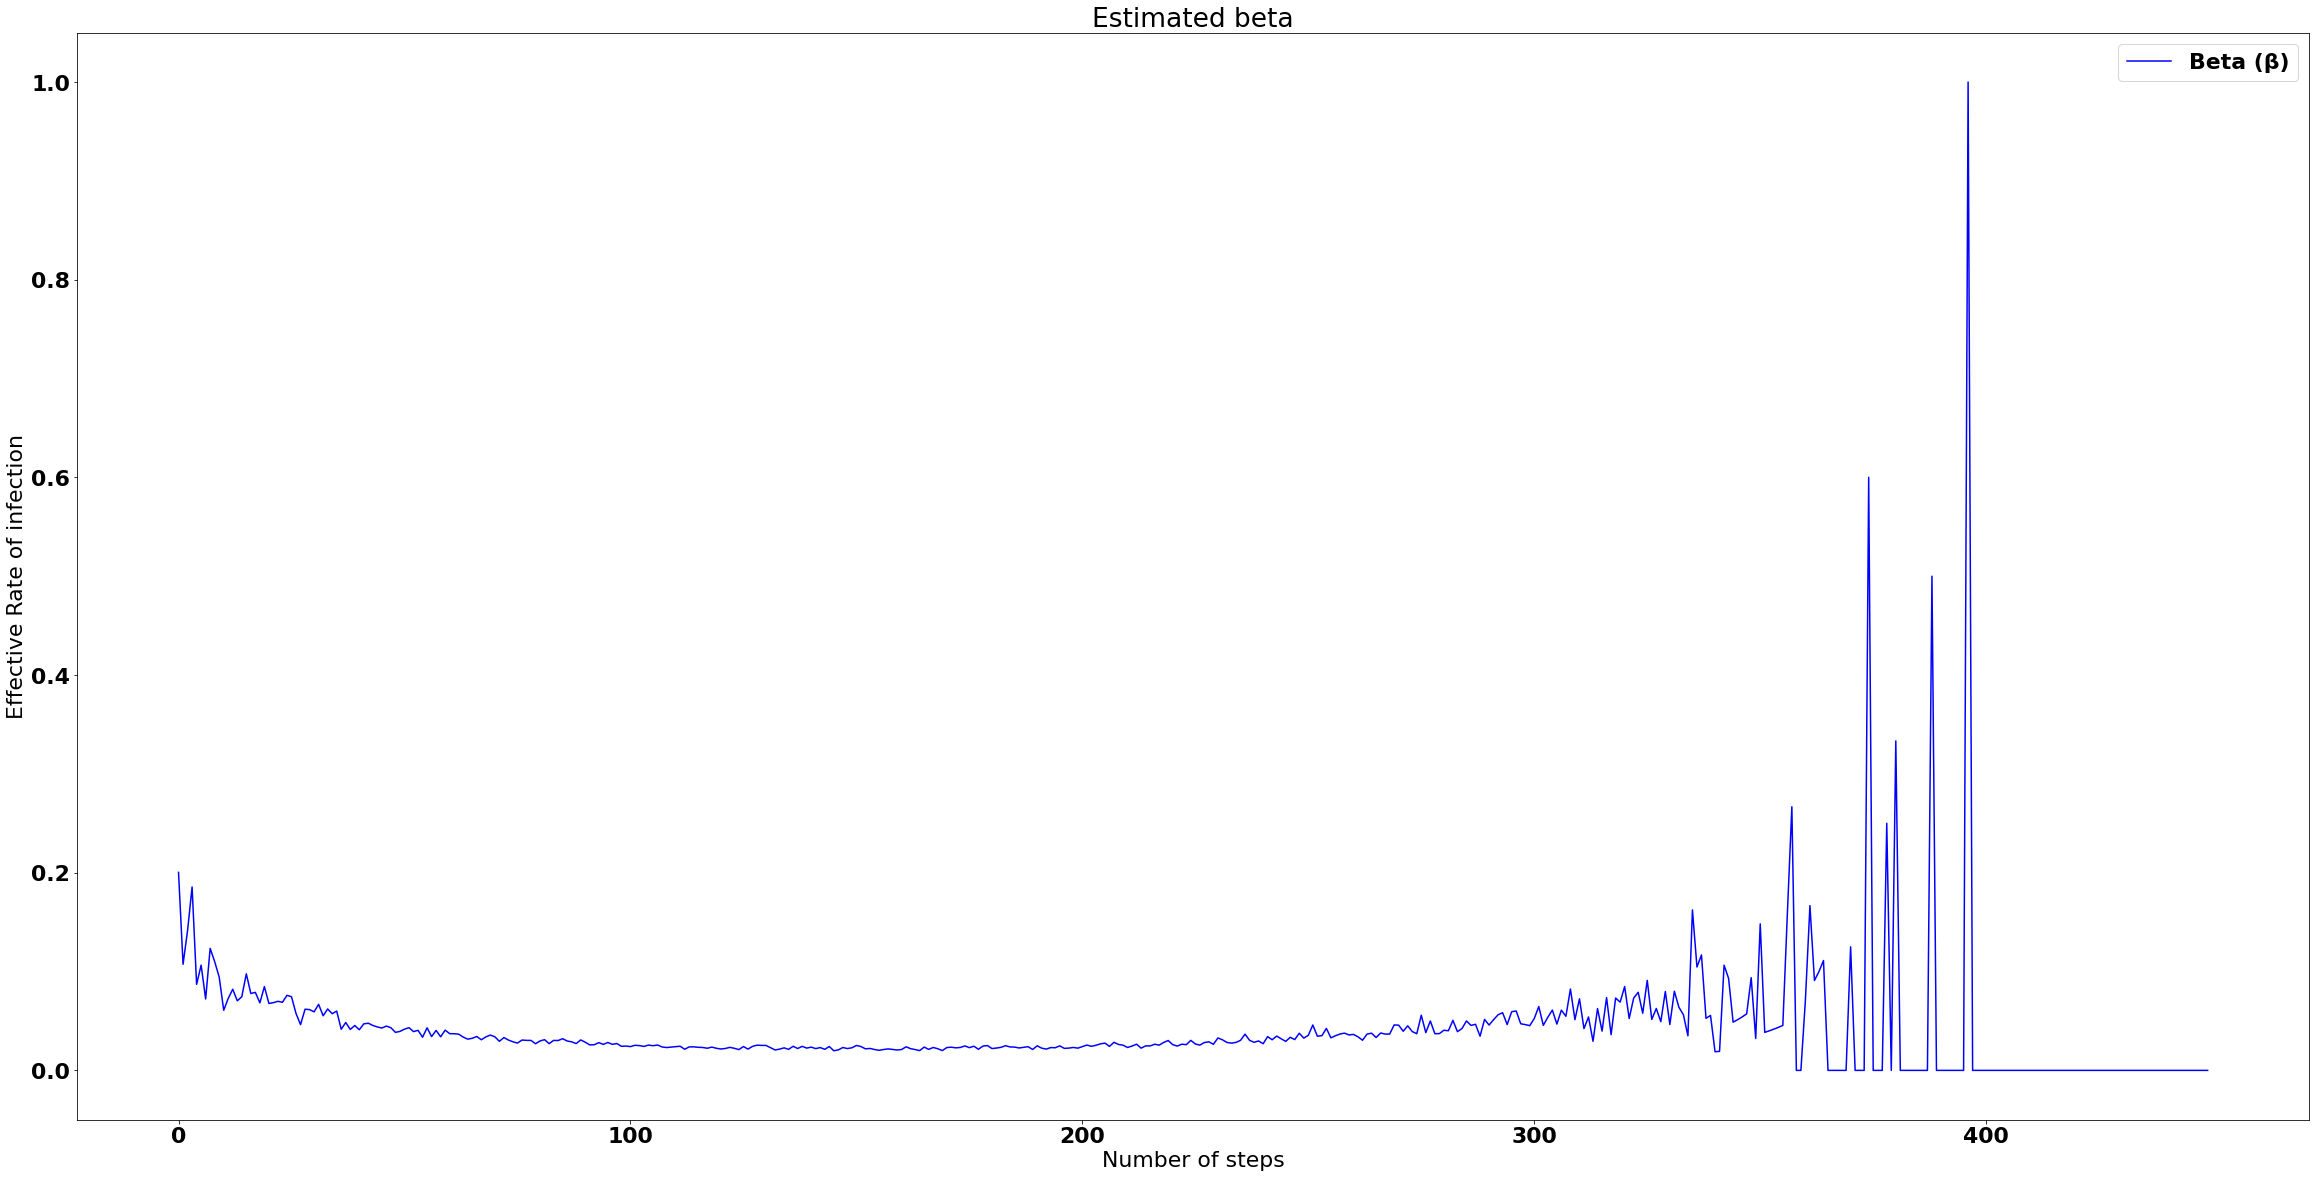

Simulation Completed! , Resetting Class Instance....
Reset subroutine called !
Reset subroutine Finished !
12min 32s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [28]:
%%timeit -n1 -r1
R3b = RandomWalkEpidemicSimulator(nx=50, ny=50,population_size = 683,ts_ = 450,repititions = 100,no_init_infected = 1)
R3b.simulateEx3(betacomp = False,Oldyounganalysis = False,Oldyounganalysis_MonteCarlo = False, betacomp_Oldyoung = True)

<p style="text-align:justify">The beta (𝛽) estimated shown in "Beta Estimated" graph gives the values for 𝛽. this is worth noticing here that there are spikes in graph. These spikes mean these are the points of time step where I(t) approaches to N (eq. 1). Ideally it should go toward zero (in analytical solution case). In the second part, "Collision grid represents the population divided into "Young" (green dots) and "Old" (blue dots). After running simulation, all gets infected, but infection's transmission rate is different for young and old population. This is quite evident in "SUSCEPTIBLE vs INFECTIOUS" first graph that Old population gets infected faster than the young one (orange line). As old population can move in any direction with 20% chance and hence the rate of infection transmission is fast in old population (shown in blue line). The red line shows the infectious population and it composes both young and old class. The probability of movement of old person for moving in any direction after getting infection is 25%. We cannot state that every time infection will spread faster in old population. The reverse can also happen but generally the mean of infection transmission rate in old will be more than the young population. That's the reason we have plotted the "SUSCEPTIBLE vs INFECTIOUS" second graph. Based on these estimated results, the "Estimated Beta" results achieved in part one of exercise 3 are slightly higher than the results (mean and median values of 𝛽) of "Estimated Beta" in the last graph as transmission rate of infection in old population is higher in Old population.

# Exercise 4
<p style="text-align:justify">This is the final part of the project where we have to implement some real world scenario. Talking about current COVID-19 situation where whole world is suffering from the adverse consequences of the pandemic, we can simulate the results of any decision before imposing to society. Here in our case we have proposed "Quarantine" and later "Vaccine" to overcome the outbreak keeping in view the real-world scenario. We also have assigned different probabilities of young and old people getting infection.
In this OYID(Old-Young-Infectious-Dead) model, we have isolated the healthy population from the infected one by imposing quarantine at 50 hours of time step and lifted the quarantine at 300 hours of time step (total simulation time is 400 hours) with same total population and in which individuals were residing. We also have assigned different probabilities of young and old people getting infection as defined in our class 90% for old people and 20 % for young people (1- probability of infection = immunity probability). Also, we are allowing some people to die with the infection at 10% death rate after every 50 hours. We will not let individual leave the isolated boundaries. Moreover, the individual which will be on boundaries at 50 hours of time step will remain at the same position until quarantine is lifted. The increase in deaths plot can be tracked by the dips in the infection plot.

<p style="text-align:justify">Similarly, we have also introduced 2 vaccines. One is Antigen Vaccine which is introduced in model at 100 hours for susceptible only. This reduces the chances of infection and these vaccine shots are injected to people after every 12 hours. This makes people immune over a period of time, by decreasing the probability of infection. This vaccination is assumed to be equally effective on old and young people, however it might take longer for old people to become completely immune because of their low immunity. The second Therapeutic Vaccine is introduced after 300 hours for infected population only and these types of vaccines are used to cure infected people. One shot of this vaccine is available after every 3 hours of its introduction.

<p style="text-align:justify">These simulations are not performed using Mote Carlo first. We have implemented our scenarios with and without Monte Carlo method. In the end, we have also implemented what will happen if we will implement Quarantine and Vaccine in same time.


### Without Monte Carlo ..

Features of the following scenario discussed:

1. Grid size 50x50 

2. Population Size = 683

3. Simulation Time = 400 hours

4. Repitions = 100 (not used as no monte carlo)

5. Number of infected people = 1

6. Quarantine On time = 50 hours

7. Lifting up quarantine at 300 hours

8. Plotting Gridplot for Begning, Before Quarantine, After Quarantine and At the end of simulation.

9. The probability for Young people to getsick = 0.2 (default value for : yq) and for old people to get sick = 0.9(default value for : q).

10. The death rate for infected people is assumed to be 0.1/50 (dr/dr_T) hours i.e. 10 percent of total infected people, randomly killed after every 50 hours. 

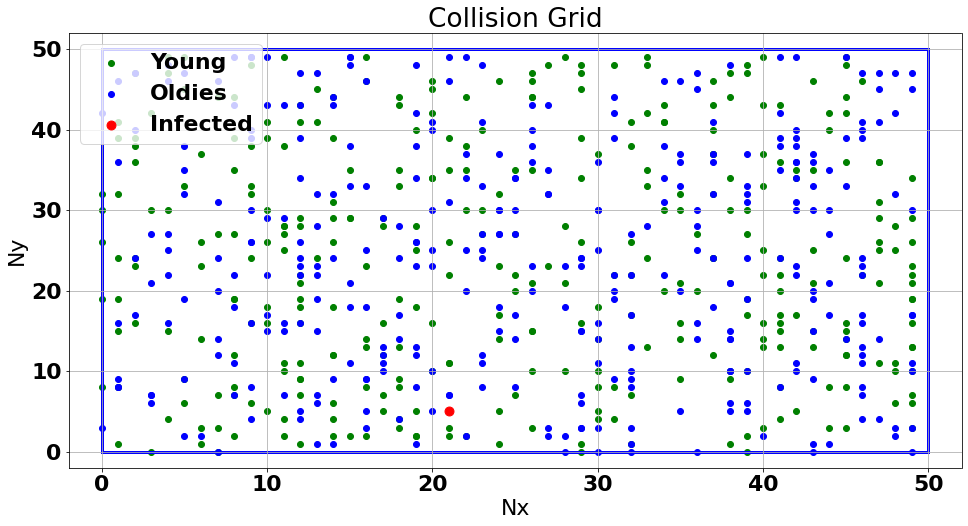

Just before Quarantine


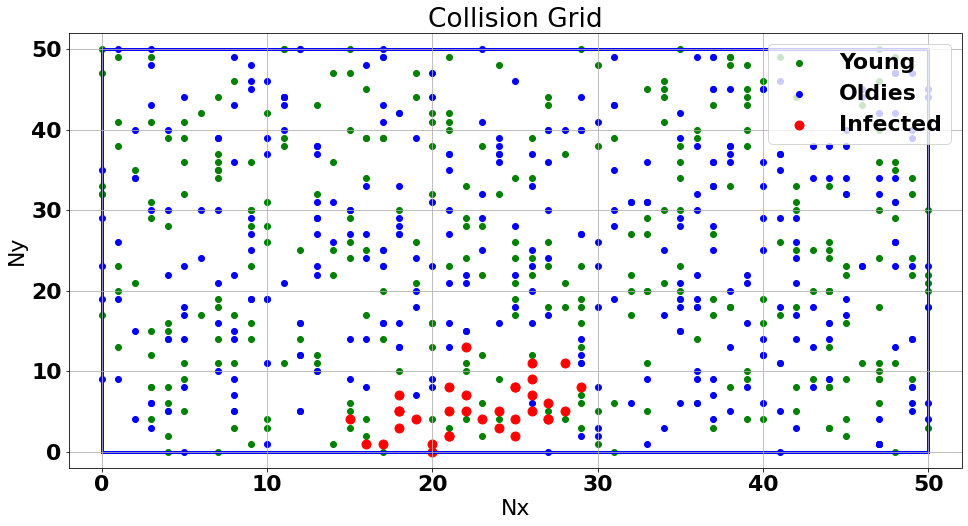

Begining Quarantine


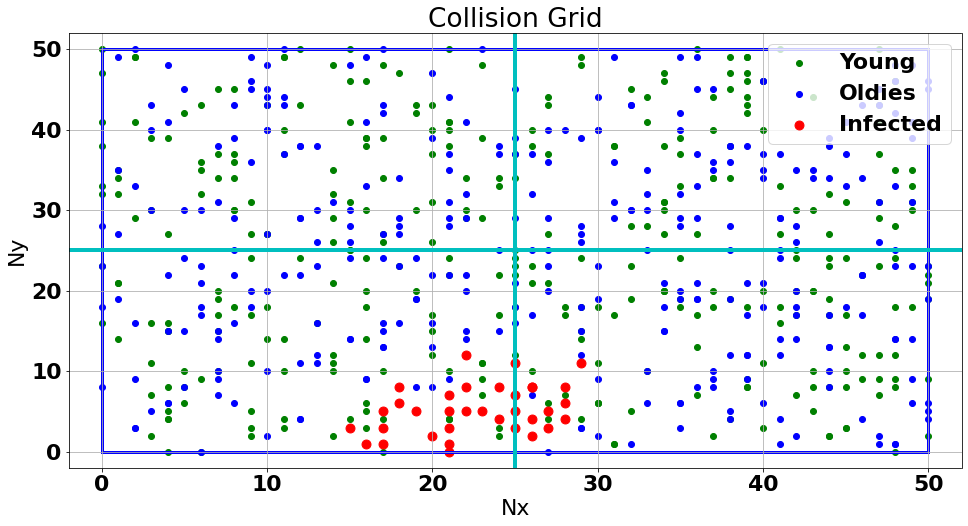

Lifting up quarantine now


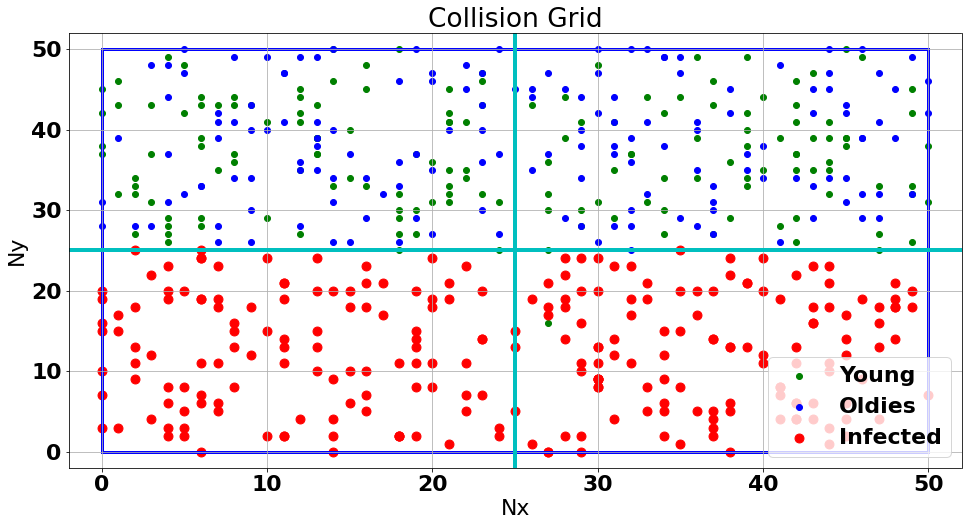

Number of old susceptible are: 81 Number of young susceptible are: 92 Number of infected individuals are: 351 Number of deaths are : 159
At the end, we lifted quarantine at:  300 hours


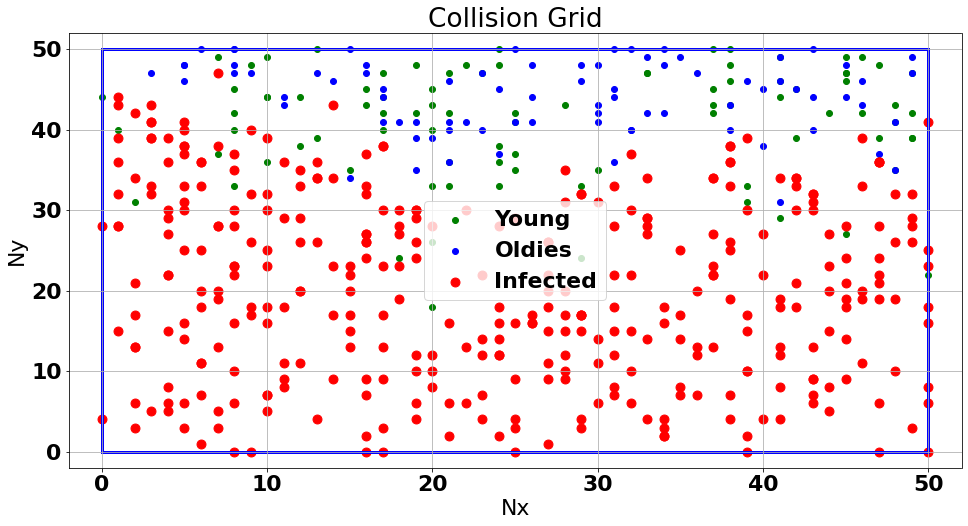

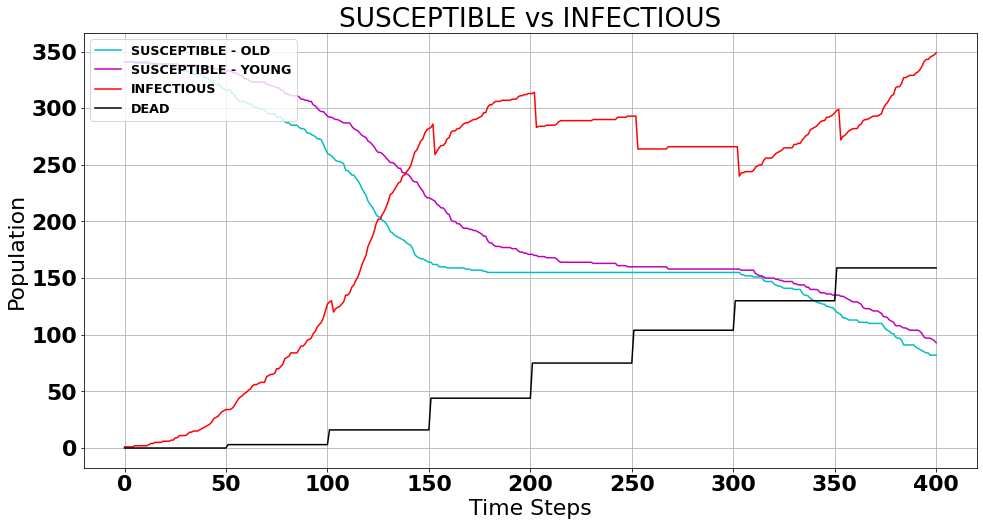

19.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [42]:
%%timeit -n1 -r1
R4 = RandomWalkEpidemicSimulator(nx=50, ny=50,population_size = 683,ts_ = 400,repititions = 100
                                 ,no_init_infected = 1, q=0.9,yq = 0.2,dr=0.1,dr_T = 50)

R4.move_OldnYoung_restricted(plotcollisiongrid = True,timeplot = True,doquarantine=50,stopquarantine = 300)

### Features of the following scenario discussed:

1. Grid size 50x50 

2. Population Size = 683

3. Simulation Time = 400 hours

4. Repitions = 100 (not used as no monte carlo)

5. Number of infected people = 1

6. No Quarantine. 

9. The probability for Young people to getsick = 0.2 (default value for : yq) and for old people to get sick = 0.9(default value for : q).

10. The death rate for infected people is assumed to be 0.1/50 (dr/dr_T) hours i.e. 10 percent of total infected people, randomly died after every 50 hours. 

11. Vaccinations introduced:

12. Antigen Vaccine: Arrival at "ant_arr" hours (100), reduces chances of infection by (ant_eff x100) percent after every shot, shots available after every "ant_Peri" (12) hours. 

13. Therapeutic Vaccine: Arrival at "Ther_arr" hours (300), cures infected people, one shot available after every "Ther_Peri" (3) hours. 

Number of old susceptible are: 261 Number of young susceptible are: 346 Number of infected individuals are: 35 Number of deaths are : 41


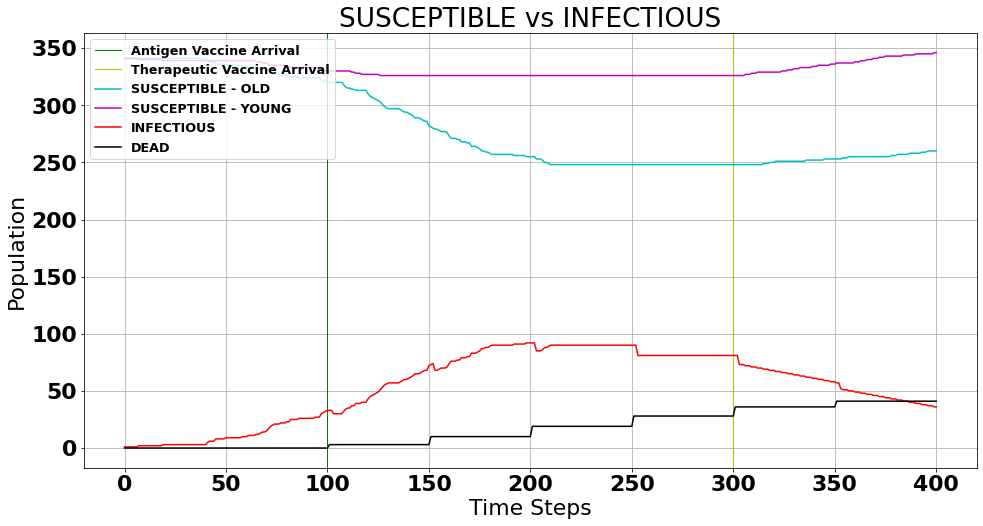

5.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [43]:
%%timeit -n1 -r1
R4b = RandomWalkEpidemicSimulator(nx=50, ny=50,population_size = 683,ts_ = 400,repititions = 100
                                 ,no_init_infected = 1, q=0.9,yq = 0.2,dr=0.1,dr_T = 50
                                 , ant_arr=100, ant_eff= 0.1, Ther_arr= 300, ant_Peri = 12, Ther_Peri=3)

R4b.move_OldnYoung_restricted(plotcollisiongrid = False,timeplot = True,doquarantine=R4b.ts_,stopquarantine =R4b.ts_,Vaccination = True )

### Monte Carlo on just Quarantine

MonteCarlo for Exercise 4 called .. 
OldnYoung_mean_STD_computation ..


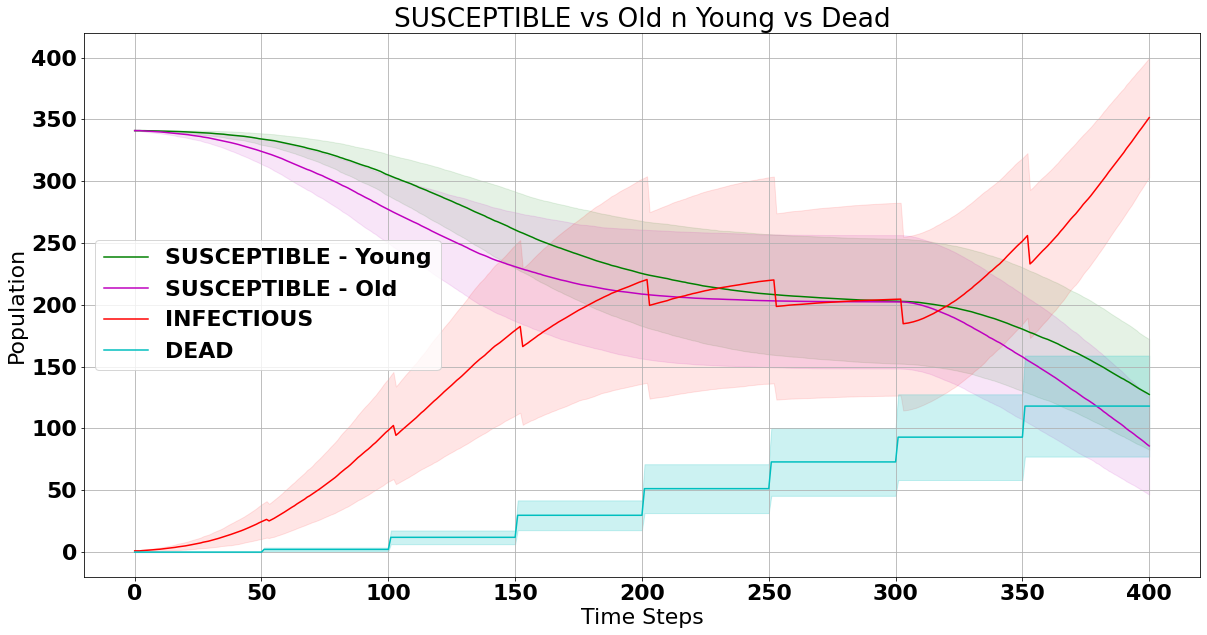

Number of old susceptible are: 82.88 Number of young susceptible are: 124.91 Number of infected individuals are: 357.09 Number of deaths are : 118.12
12min 35s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [44]:
%%timeit -n1 -r1
R4c = RandomWalkEpidemicSimulator(nx=50, ny=50,population_size = 683,ts_ = 400,repititions = 100
                                 ,no_init_infected = 1, q=0.9,yq = 0.2,dr=0.1,dr_T = 50)
p = R4c.MonteCarlo_(plotcollisiongrid = False,timeplot = False,doquarantine = 50,stopquarantine = 300,Vaccination = False,plotvstime=True)

### Monte Carlo on just Vaccination

MonteCarlo for Exercise 4 called .. 
OldnYoung_mean_STD_computation ..


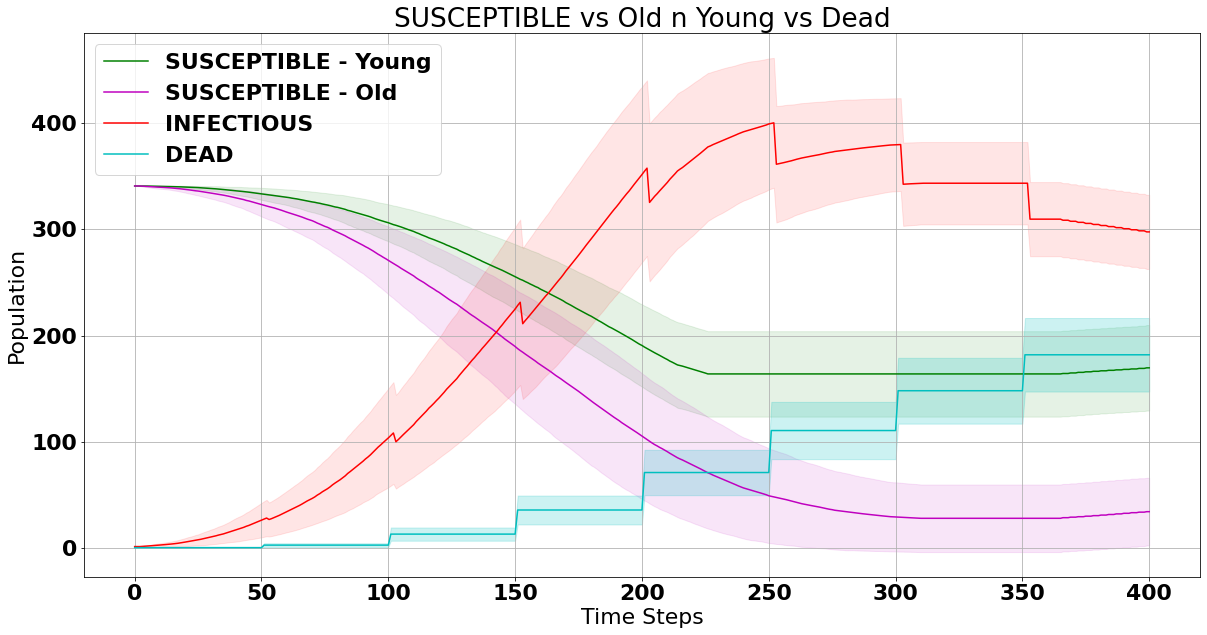

Number of old susceptible are: 34.31 Number of young susceptible are: 170.13 Number of infected individuals are: 296.72 Number of deaths are : 181.84
7min 29s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [45]:
%%timeit -n1 -r1
R4c1 = RandomWalkEpidemicSimulator(nx=50, ny=50,population_size = 683,ts_ = 400,repititions = 100
                                 ,no_init_infected = 1, q=0.9,yq = 0.2,dr=0.1,dr_T = 50
                                 , ant_arr=200, ant_eff= 0.1, Ther_arr= 360, ant_Peri = 12, Ther_Peri=3)
p = R4c1.MonteCarlo_(plotcollisiongrid = False,timeplot = False,doquarantine = R4c1.ts_,stopquarantine = R4c1.ts_,Vaccination = True,plotvstime=True)

### Vaccination and Quarantine Combined

MonteCarlo for Exercise 4 called .. 
OldnYoung_mean_STD_computation ..


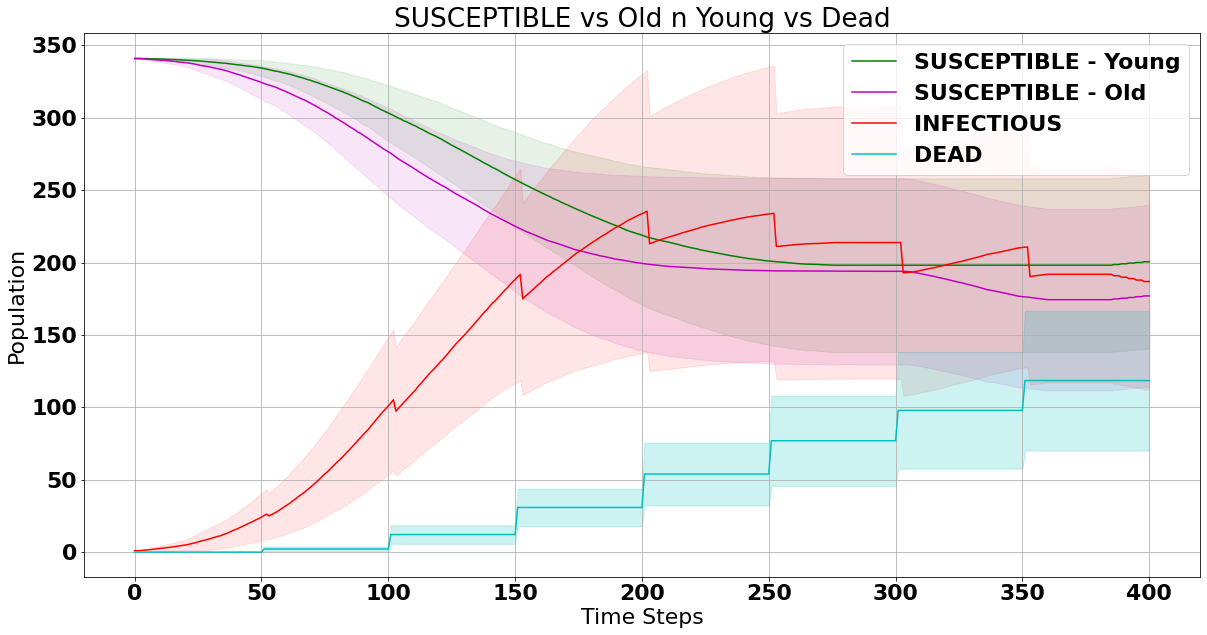

Number of old susceptible are: 177.45 Number of young susceptible are: 201.12 Number of infected individuals are: 185.93 Number of deaths are : 118.5
13min 21s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [46]:
%%timeit -n1 -r1
R4d = RandomWalkEpidemicSimulator(nx=50, ny=50,population_size = 683,ts_ = 400,repititions = 100
                                 ,no_init_infected = 1, q=0.9,yq = 0.2,dr=0.1,dr_T = 50
                                 , ant_arr=250, ant_eff= 0.1, Ther_arr= 380, ant_Peri = 12, Ther_Peri=3)

p = R4d.MonteCarlo_(plotcollisiongrid = False,timeplot = False,doquarantine = 50,stopquarantine = 300,Vaccination = True,plotvstime=True)

### Beta for both MonteCarlo and Vaccination Combined

MonteCarlo for Exercise 4 called .. 
OldnYoung_mean_STD_computation ..


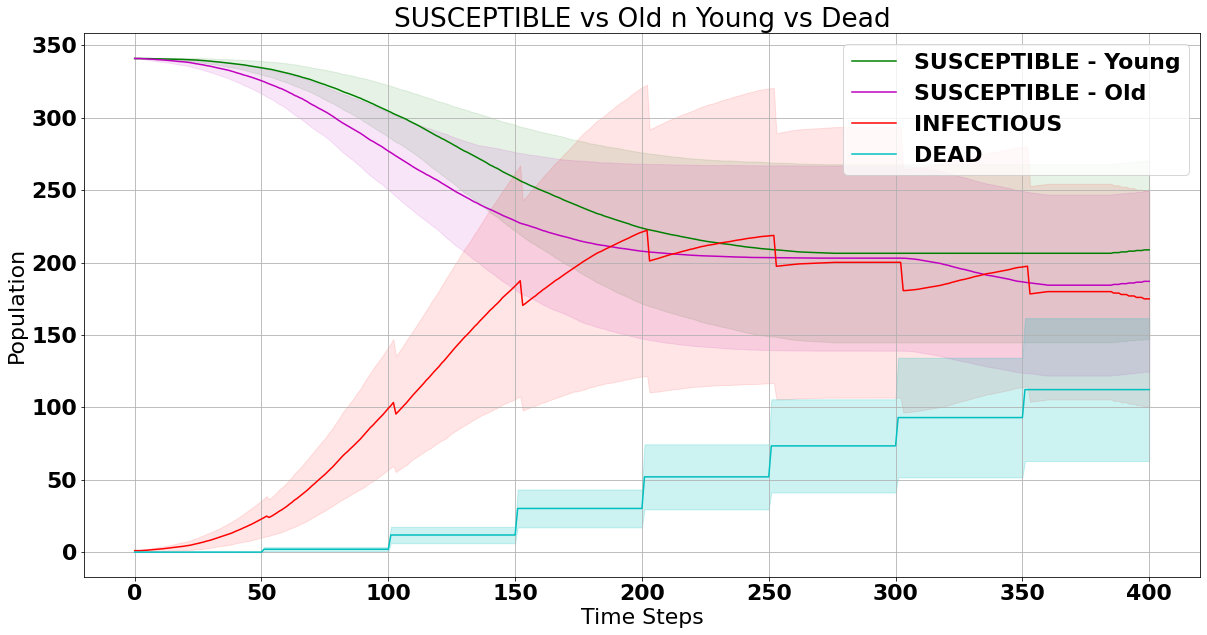

Number of old susceptible are: 187.57 Number of young susceptible are: 209.24 Number of infected individuals are: 173.94 Number of deaths are : 112.25
S and I mean array wrt. time steps ceated
Mean of Beta =  0.015833287326984614 Median of Beta =  0.004936854969168753 



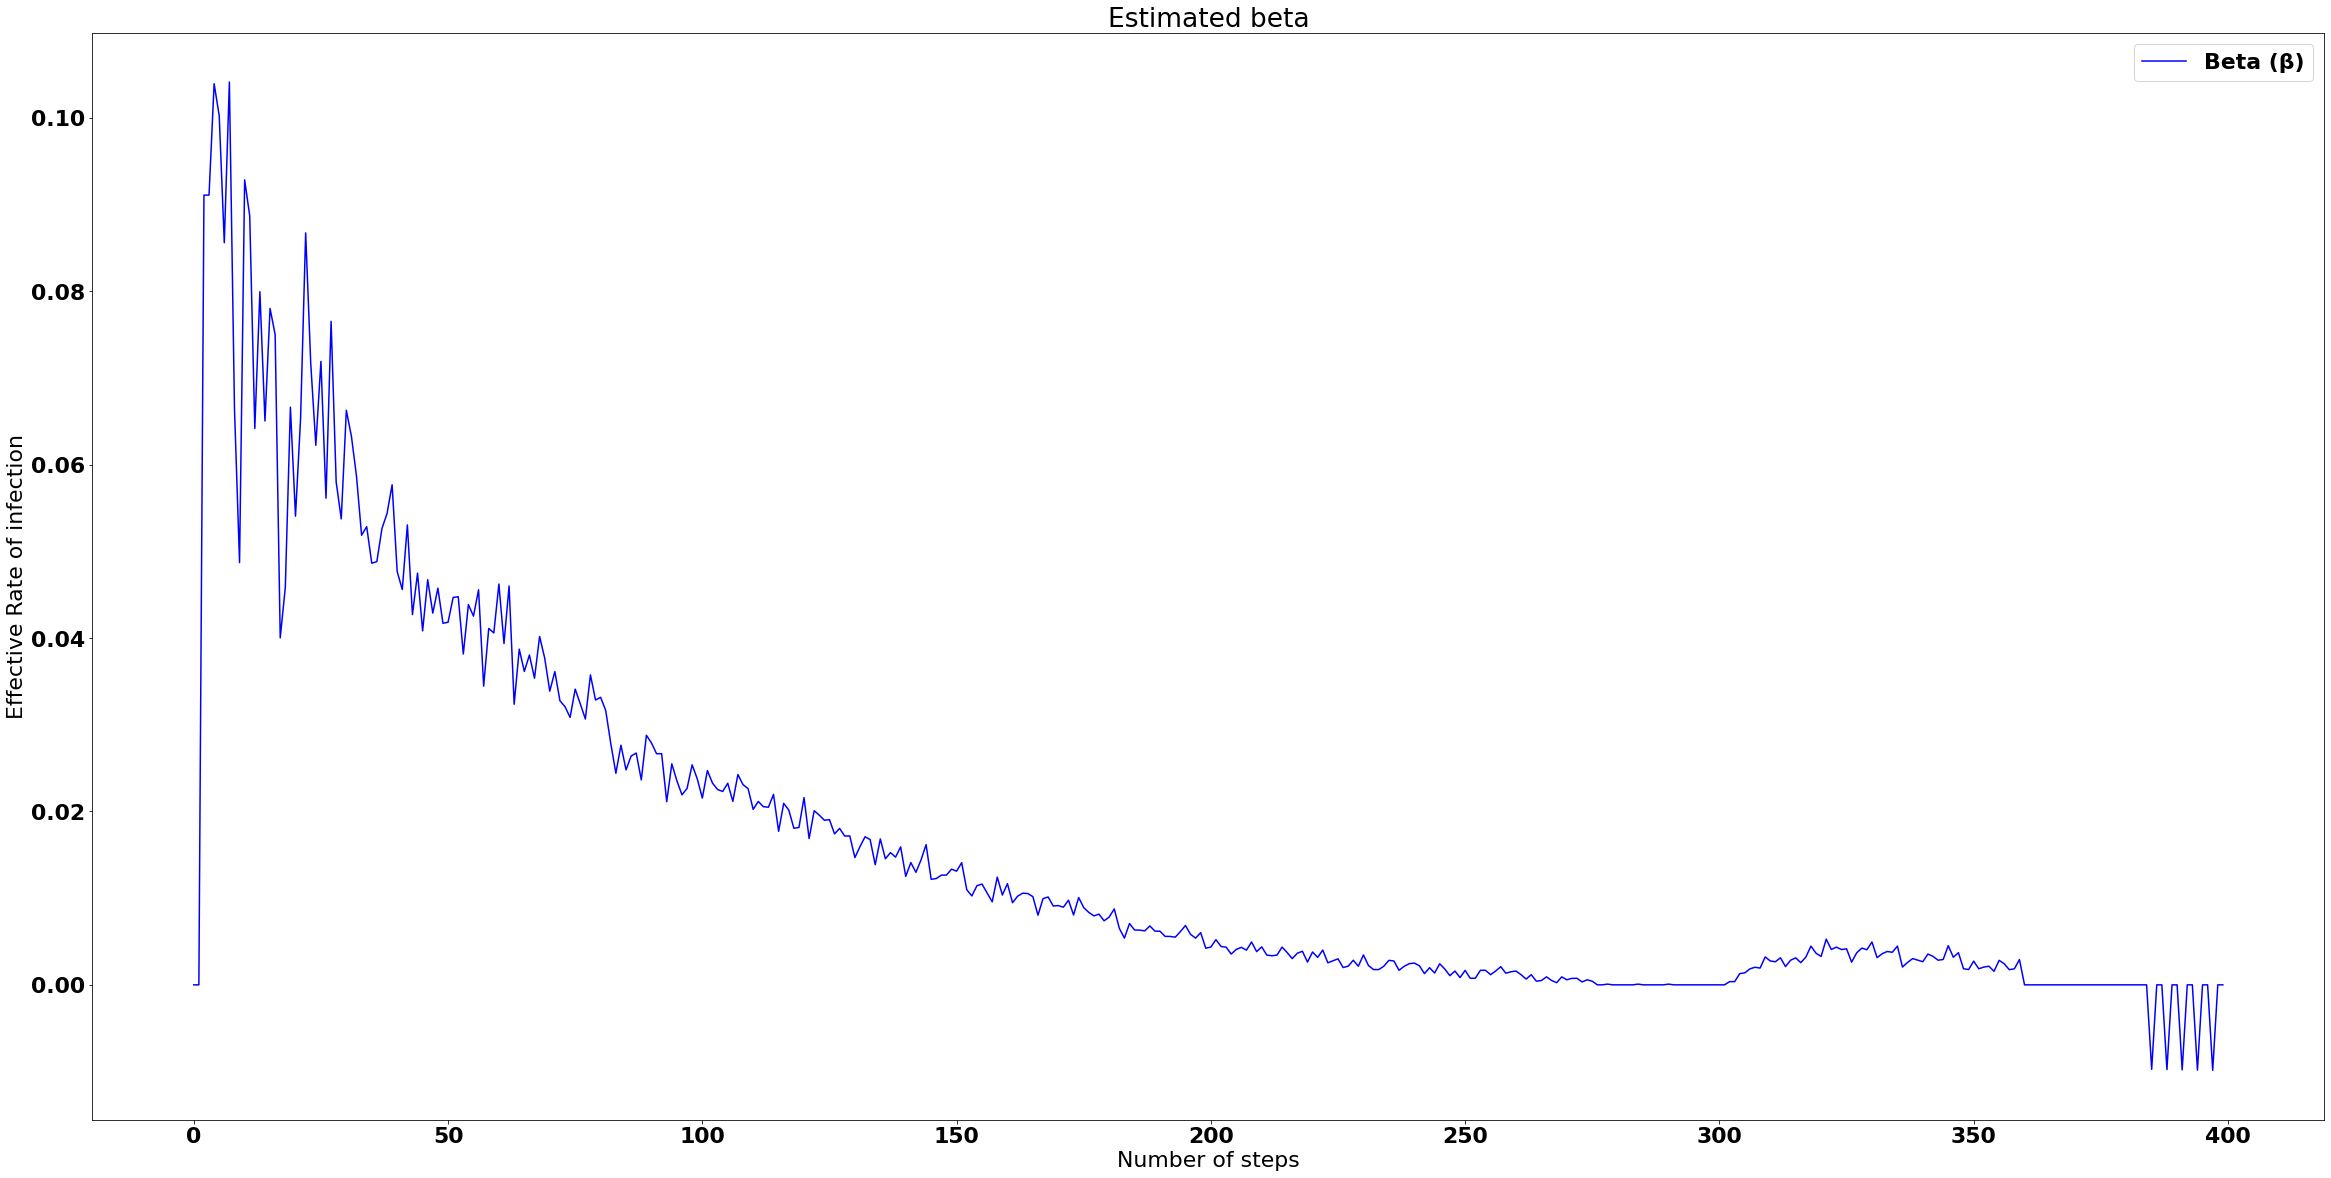

13min 29s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [47]:
%%timeit -n1 -r1
R4d = RandomWalkEpidemicSimulator(nx=50, ny=50,population_size = 683,ts_ = 400,repititions = 100
                                 ,no_init_infected = 1, q=0.9,yq = 0.2,dr=0.1,dr_T = 50
                                 , ant_arr=250, ant_eff= 0.1, Ther_arr= 380, ant_Peri = 12, Ther_Peri=3)
R4d.beta_Calc_Ex4(plotcollisiongrid = False,timeplot = False,doquarantine = 50,stopquarantine = 300,Vaccination = True,plotvstime=True)

<p style="text-align:justify">First we will comment about Quarantine condition. No infection occurs in the isolated healthy parts of region during quarantine which means quarantine is effective in order to restrict the transmission. Also, some young individuals inside the infection zone also remain uninfected during the simulation (as their probability is low to get infected). After lifting quarantine, we still have some uninfected population which is a good thing. The first graph labeled as "Susceptible vs Infectious" shows the effect of quarantine in spread of infection. The infection spread decreases (see red line) when the quarantine is imposed overall but, in the region, where initially infection was present, seems to have increasing number of infectious. In simulation, from 50 hours to 150 hours, infection keep on increasing inside the infectious zone and then we can see a drop in the infection spread until quarantine is lifted. The infection drop is not because of any vaccine (as we have not introduced any vaccine yet) but due to deaths of infectious where death occurs only inside infected population inside infected zone. The purple and blue line indicating young and old population shows a constant behavior from the time the infection rate inside infection zone reaches its peak value till the point where quarantine is lifted indicating that susceptible remain constant till quarantine lift up period and then they again start decreasing. The same results are achieved when implemented through Monte Carlo method, but it just smoothens the curves and the shaded area represents the overall deviation of the particular parameter from their mean value.
    
<p style="text-align:justify">The Vaccination introduced in simulation depicts not only fall in infection rate but also indicates the rise in susceptible after some time. Antigen vaccine (introduced at 100 hours) makes people immune and after some time our all remaining old and young susceptible population becomes immune. We can see a fall in infection rate which is also because the deaths are still occurring in infected population side by side. When Therapeutic vaccine is introduced, we can see the increase in susceptible population along fall in disease transmission. One more thing that is worth noticing is, Antigen vaccine increase the immunity of young people faster than old population as the young one has more immunity which flattens the young population curve earlier than old population. Almost similar type of results are achieved when implemented this scenario with Monte Carlo method.
In the last part where Quarantine and Vaccine are implemented together, we can achieve very good results with more increase in Susceptible population, fall of infection spread and a smaller number of deaths as we can save people more and early. The last graph represents the beta value and the negative spikes in beta values are due to decreasing Infection and increase in Susceptible (Old and Young).

    
<p style="text-align:justify">These results can be related in real world in a way like those countries where COVID-19 transmission rate was high and they implemented the quarantine earlier kept their remaining population safe as compared to those which imposed less quarantine or imposed quarantine at later stages.

# Conclusion
<p style="text-align:justify">With Monte Carlo simulations and Random Walk method, we tried to model how disease outbreak spread in a certain region. These types of models can represent a much clear picture what to do in such situations. They not only help to identify the important factors like infection transmission rate in such case but also give insight of these parameters. With incorporating different parameters and changing initial conditions, we can easily simulate what can be best and worst conditions in these situations like changing the infected number of individuals from 1 to 10. Similarly, as different age group have different resistance level, we can generalize these properties to select how we can keep more people infection free. With help of these models, we can then treat people on priority basis like young people are immune than old one, they can wait a little as compared to old one. We can also relate and use these models to see what and when we should take extreme steps to keep maximum population safe. This is because for example in our case, imposing quarantine is not an easy step by any government. This effect ordinary people’s lives, economy, industry and other important factors of a country. These are very critical stages where government cannot impose things like this as the results have consequences on whole country. These models can help a lot in such situations.

# Personal Reflections

<p style="text-align:justify">The projects aim to utilize Monte Carlo simulation in estimating the movement of mass between compartments in a multi-compartment model. The problem under discussion here is the transmission of infection among a population, initially we started with 2 compartments, Susceptible and Infectious. This is the most basic form of compartment model, as there are only 2 compartments in it, here the population flows from susceptible compartment to infected compartment. Additional sub-divisions between a compartment can be introduced, in this problem this was achieved by dividing susceptible to Old and young population. If the FLOW of Old and Young population from susceptible container to infectious container, is considered as flow of mass from one compartment to another, we clearly understand the application of compartment models here. 
 
In this project Compartment Model is combined with Random Walk experiment to understand the spread of infection in a population, over a defined period of time, since we are using Random Walk experiment, the best possible way to model the uncertainty which comes along with the Random Walk is to incorporate  Monte Carlo method. These methods not only help us to understand the movement but also elaborate how the model will behave when different conditions such as quarantine, addition of a new compartment (Deaths), division of a compartment (S -> O,Y) or vaccination are imposed on the system. The behavior or outcome under different conditions can be evaluated in terms of “The effective growth rate of Infection (ẞ)”, which is estimated both numerically and analytically here.
    
<p style="text-align:justify"> These type of exercises urge us to think out of the box and lead to a healthy team discussion. This project helped us to understand the COVID-19 spread in a much better way and to understand why quarantine or isolation is important in such conditions. These types of projects could be extended further like how we can treat different age classes and which precautionary measures would be more effective in such pandemics. We also learned a great deal about Monte Carlo method, however there is a limitation of using this method which is the high computational power it requires. 

# References 
<div id="hiorth2019"></div>[1] E. A. Codling, M. J. Plank and S. Benhamou. Random Walk Models in Biology, Journal of the Royal society interface, 5(25), pp. 813-834, 2008.
<div id="hiorth2019"></div>[2] C. L. Althaus. Estimating the Reproduction Number of Ebola Virus (EBOV) During the 2014 Outbreak in West Africa, PLoS currents, 6, 2014.
<div id="hiorth2019"></div>[3] K. Pearson. The Problem of the Random Walk, Nature, 72(1867), pp. 342, 1905.
<div id="hiorth2019"></div>[4] Therapeutic Vaccines and Other types.
https://www.webmd.com/vaccines/features/treating-disease-with-vaccines#1
